In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/werner/Werner.m4a
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_01.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_11.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_15.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_35.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_31.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_13.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_21.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_27.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_03.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_20.wav
/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_43.wav
/kaggle/input/german-pronounciation/All Audi

# *# #Making a Model using Prosodic Features*

# ****The Feature extraction for labeling

In [2]:
import os
import librosa
import numpy as np

def extract_prosodic_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract features
    # pitch (fundamental frequency), energy, duration
    pitch = librosa.yin(y, fmin=50, fmax=2000)
    energy = librosa.feature.rms(y=y)
    duration = librosa.get_duration(y=y, sr=sr)

    # Calculate statistical features (mean, standard deviation)
    pitch_mean = np.mean(pitch)
    pitch_std = np.std(pitch)
    energy_mean = np.mean(energy)
    energy_std = np.std(energy)

    # Return extracted features as a dictionary
    features = {
        'pitch_mean': pitch_mean,
        'pitch_std': pitch_std,
        'energy_mean': energy_mean,
        'energy_std': energy_std,
        'duration': duration
        # Add more features here
    }

    return features

# Path to the directory containing audio files
directory = '/kaggle/input/german-pronounciation/All Audios'

# Initialize lists to store features and labels
all_features = []
all_labels = []

# Process audio files in correct subfolder
correct_directory = os.path.join(directory, '/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset')
for filename in os.listdir(correct_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(correct_directory, filename)
        features = extract_prosodic_features(audio_file)
        all_features.append(features)
        all_labels.append(1)

# Process audio files in incorrect subfolder
incorrect_directory = os.path.join(directory, '/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset')
for filename in os.listdir(incorrect_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(incorrect_directory, filename)
        features = extract_prosodic_features(audio_file)
        all_features.append(features)
        all_labels.append(0)

# Convert lists to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)



In [3]:
print(all_features)



[{'pitch_mean': 464.2236559832478, 'pitch_std': 648.9978151194142, 'energy_mean': 0.02400139, 'energy_std': 0.032383714, 'duration': 4.096}
 {'pitch_mean': 429.3573608958406, 'pitch_std': 643.5331942615496, 'energy_mean': 0.019637289, 'energy_std': 0.030347236, 'duration': 3.7546666666666666}
 {'pitch_mean': 380.8550093640086, 'pitch_std': 608.1645272306981, 'energy_mean': 0.022818202, 'energy_std': 0.027738225, 'duration': 4.8853333333333335}
 {'pitch_mean': 303.6167391187459, 'pitch_std': 451.81658002515525, 'energy_mean': 0.053320937, 'energy_std': 0.017848916, 'duration': 5.856689342403628}
 {'pitch_mean': 268.39009215593103, 'pitch_std': 431.51996733878826, 'energy_mean': 0.04703704, 'energy_std': 0.016611097, 'duration': 8.919727891156462}
 {'pitch_mean': 318.6256226000115, 'pitch_std': 591.6073839716569, 'energy_mean': 0.028377, 'energy_std': 0.029614635, 'duration': 4.501333333333333}
 {'pitch_mean': 251.46708958122858, 'pitch_std': 376.74879665130925, 'energy_mean': 0.05589406

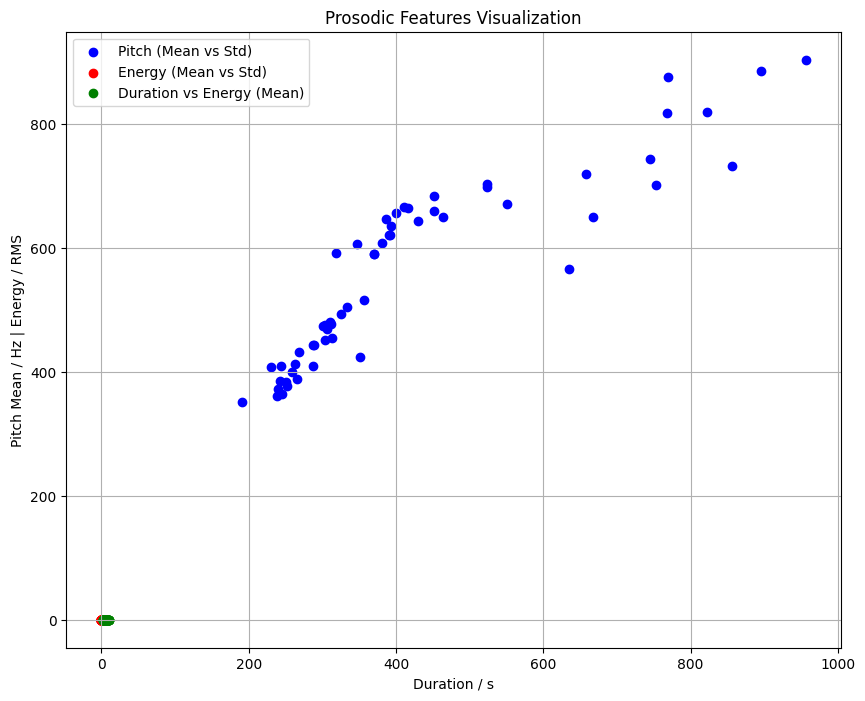

In [4]:
import matplotlib.pyplot as plt

# Extract individual features
pitch_mean = [feat['pitch_mean'] for feat in all_features]
pitch_std = [feat['pitch_std'] for feat in all_features]
energy_mean = [feat['energy_mean'] for feat in all_features]
energy_std = [feat['energy_std'] for feat in all_features]
duration = [feat['duration'] for feat in all_features]

# Create a scatter plot
plt.figure(figsize=(10, 8))

plt.scatter(pitch_mean, pitch_std, color='blue', label='Pitch (Mean vs Std)')
plt.scatter(energy_mean, energy_std, color='red', label='Energy (Mean vs Std)')
plt.scatter(duration, energy_mean, color='green', label='Duration vs Energy (Mean)')

plt.xlabel('Duration / s')
plt.ylabel('Pitch Mean / Hz | Energy / RMS')
plt.title('Prosodic Features Visualization')
plt.legend()
plt.grid(True)

plt.show()


In [5]:
print(all_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [6]:
print(all_labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


# Test Case 01-SVM Model 01

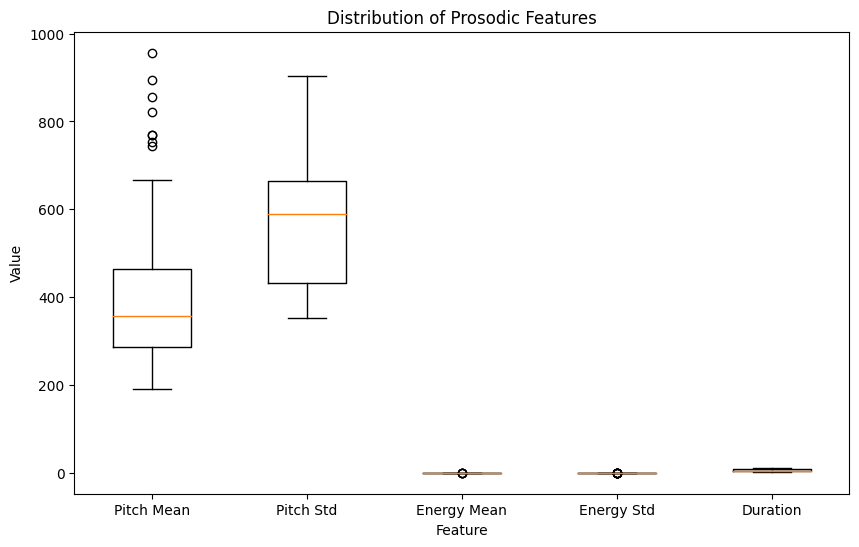

In [7]:
import matplotlib.pyplot as plt

# Extract individual features
pitch_mean = [item['pitch_mean'] for item in all_features]
pitch_std = [item['pitch_std'] for item in all_features]
energy_mean = [item['energy_mean'] for item in all_features]
energy_std = [item['energy_std'] for item in all_features]
duration = [item['duration'] for item in all_features]

# Create boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([pitch_mean, pitch_std, energy_mean, energy_std, duration], labels=['Pitch Mean', 'Pitch Std', 'Energy Mean', 'Energy Std', 'Duration'])
plt.title('Distribution of Prosodic Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()


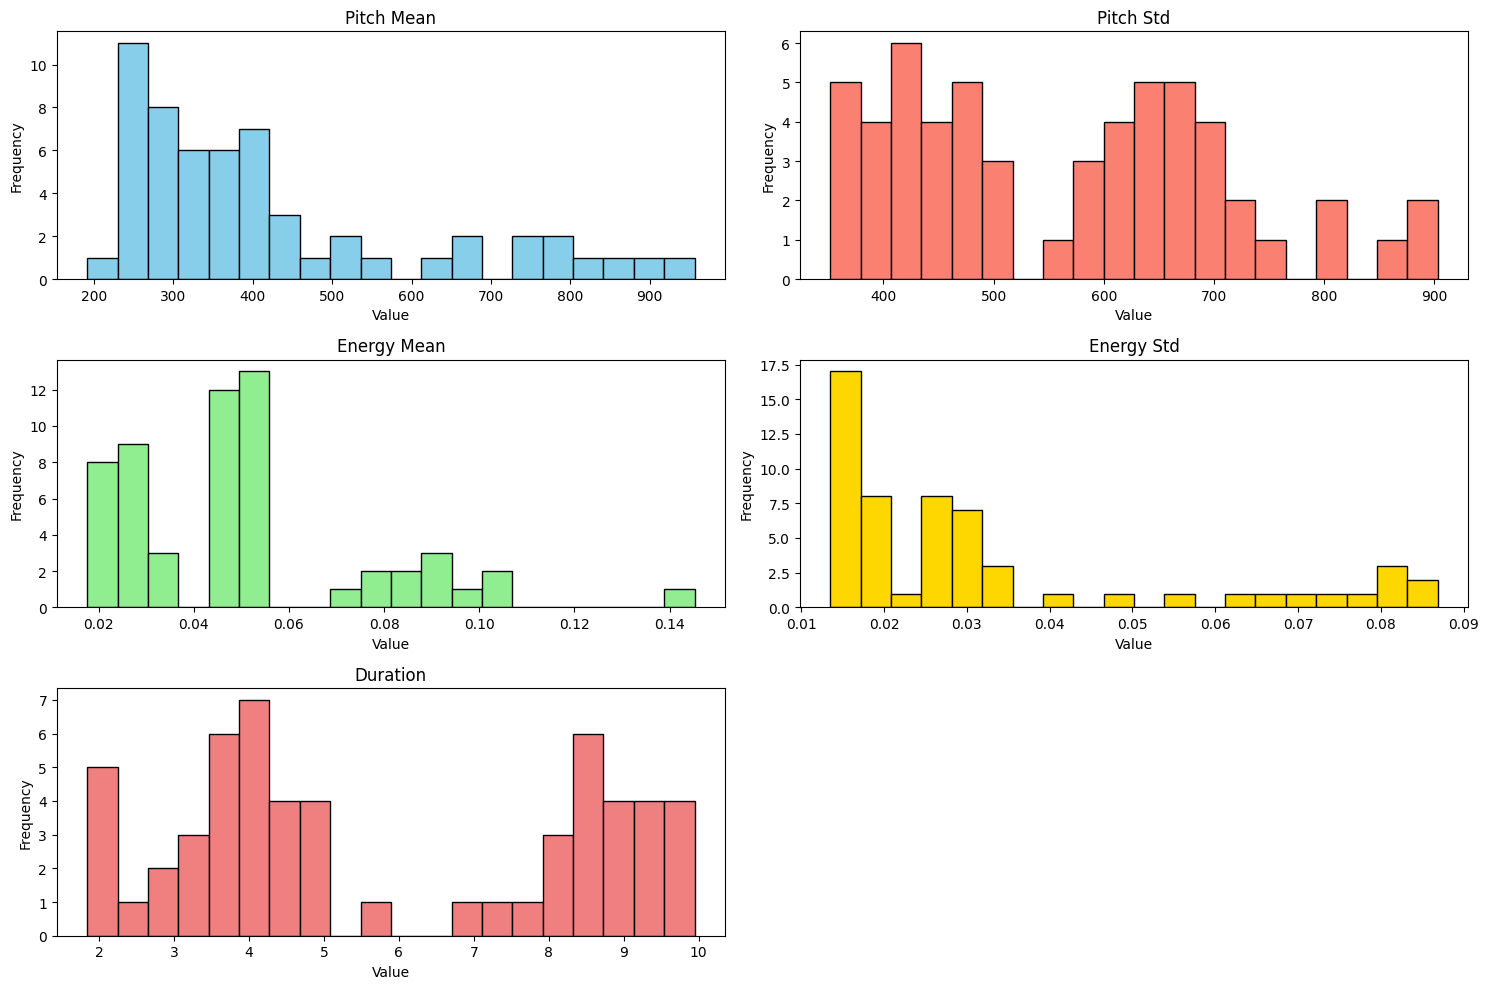

In [8]:
import matplotlib.pyplot as plt

# Extract individual features
pitch_mean = [item['pitch_mean'] for item in all_features]
pitch_std = [item['pitch_std'] for item in all_features]
energy_mean = [item['energy_mean'] for item in all_features]
energy_std = [item['energy_std'] for item in all_features]
duration = [item['duration'] for item in all_features]

# Create histograms
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(pitch_mean, bins=20, color='skyblue', edgecolor='black')
plt.title('Pitch Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
plt.hist(pitch_std, bins=20, color='salmon', edgecolor='black')
plt.title('Pitch Std')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
plt.hist(energy_mean, bins=20, color='lightgreen', edgecolor='black')
plt.title('Energy Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
plt.hist(energy_std, bins=20, color='gold', edgecolor='black')
plt.title('Energy Std')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
plt.hist(duration, bins=20, color='lightcoral', edgecolor='black')
plt.title('Duration')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [9]:
import numpy as np

# Calculate mean values
pitch_mean_mean = np.mean(pitch_mean)
pitch_std_mean = np.mean(pitch_std)
energy_mean_mean = np.mean(energy_mean)
energy_std_mean = np.mean(energy_std)
duration_mean = np.mean(duration)

print("Pitch Mean Mean:", pitch_mean_mean)
print("Pitch Std Mean:", pitch_std_mean)
print("Energy Mean Mean:", energy_mean_mean)
print("Energy Std Mean:", energy_std_mean)
print("Duration Mean:", duration_mean)


Pitch Mean Mean: 422.15757475407594
Pitch Std Mean: 564.4041898666553
Energy Mean Mean: 0.050176337
Energy Std Mean: 0.03269626
Duration Mean: 5.8544526047261005


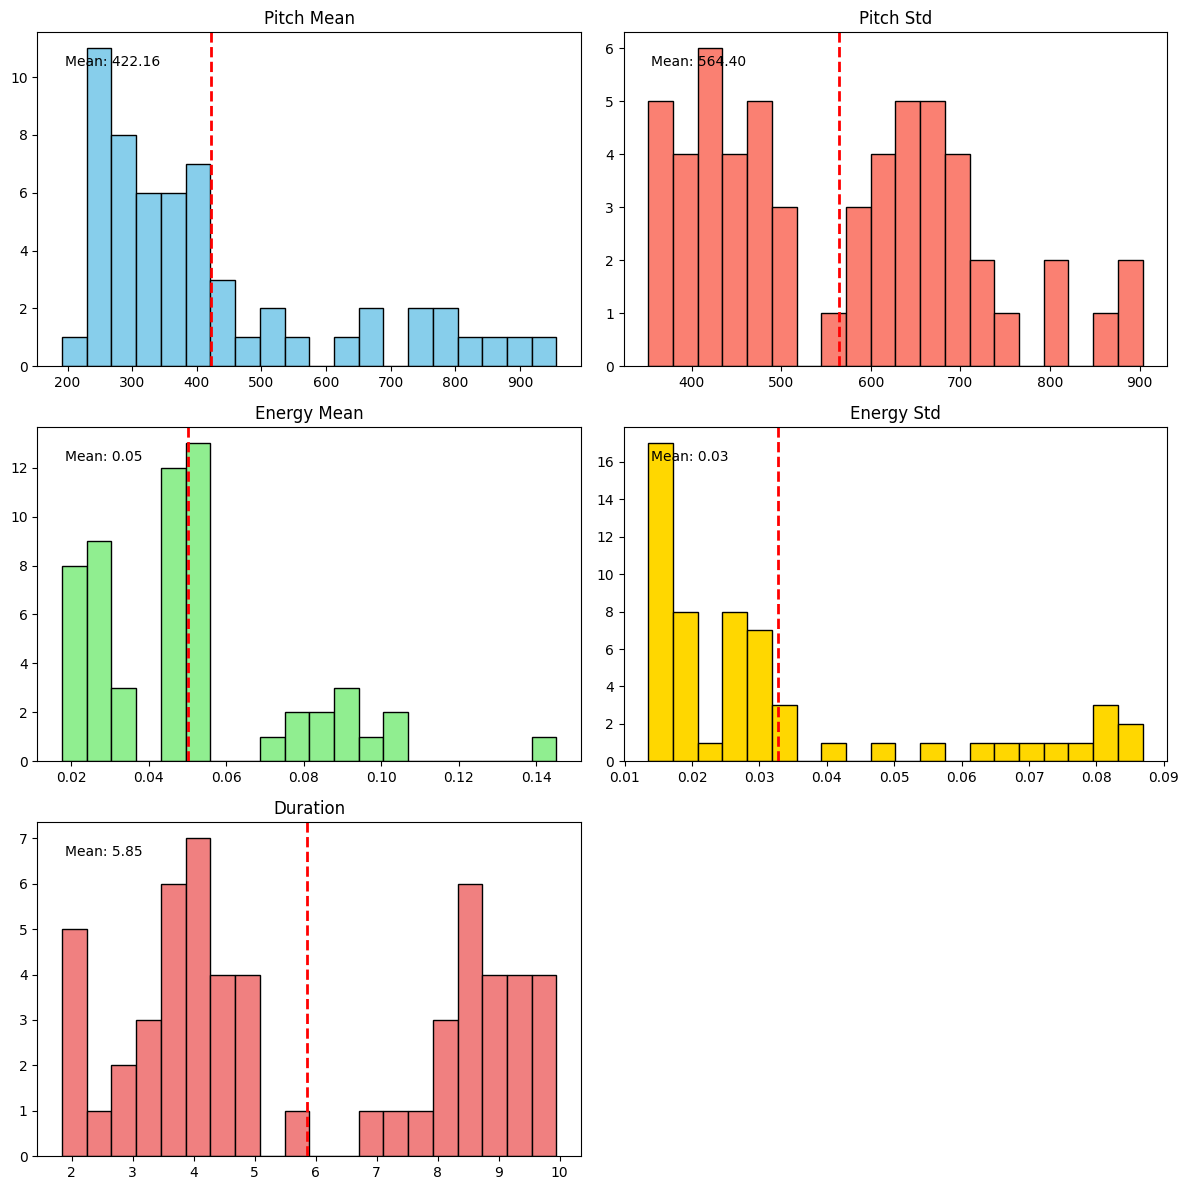

In [10]:
import matplotlib.pyplot as plt

# Extract individual features
pitch_mean = np.array([feature['pitch_mean'] for feature in all_features])
pitch_std = np.array([feature['pitch_std'] for feature in all_features])
energy_mean = np.array([feature['energy_mean'] for feature in all_features])
energy_std = np.array([feature['energy_std'] for feature in all_features])
duration = np.array([feature['duration'] for feature in all_features])

# Create subplots for each feature
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot histograms and add mean value annotations
axs[0, 0].hist(pitch_mean, bins=20, color='skyblue', edgecolor='black')
axs[0, 0].axvline(x=np.mean(pitch_mean), color='r', linestyle='--', linewidth=2)
axs[0, 0].text(0.05, 0.9, f"Mean: {np.mean(pitch_mean):.2f}", transform=axs[0, 0].transAxes)
axs[0, 0].set_title('Pitch Mean')

axs[0, 1].hist(pitch_std, bins=20, color='salmon', edgecolor='black')
axs[0, 1].axvline(x=np.mean(pitch_std), color='r', linestyle='--', linewidth=2)
axs[0, 1].text(0.05, 0.9, f"Mean: {np.mean(pitch_std):.2f}", transform=axs[0, 1].transAxes)
axs[0, 1].set_title('Pitch Std')

axs[1, 0].hist(energy_mean, bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].axvline(x=np.mean(energy_mean), color='r', linestyle='--', linewidth=2)
axs[1, 0].text(0.05, 0.9, f"Mean: {np.mean(energy_mean):.2f}", transform=axs[1, 0].transAxes)
axs[1, 0].set_title('Energy Mean')

axs[1, 1].hist(energy_std, bins=20, color='gold', edgecolor='black')
axs[1, 1].axvline(x=np.mean(energy_std), color='r', linestyle='--', linewidth=2)
axs[1, 1].text(0.05, 0.9, f"Mean: {np.mean(energy_std):.2f}", transform=axs[1, 1].transAxes)
axs[1, 1].set_title('Energy Std')

axs[2, 0].hist(duration, bins=20, color='lightcoral', edgecolor='black')
axs[2, 0].axvline(x=np.mean(duration), color='r', linestyle='--', linewidth=2)
axs[2, 0].text(0.05, 0.9, f"Mean: {np.mean(duration):.2f}", transform=axs[2, 0].transAxes)
axs[2, 0].set_title('Duration')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


*Scaling*

In [11]:
#from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Encode labels to numerical values
#all_labels_encoded = label_encoder.fit_transform(all_labels)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels_encoded, test_size=0.2, random_state=42)


In [12]:
print(all_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert list of dictionaries into a 2D array
X = np.array([list(d.values()) for d in all_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, all_labels, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

#  Choose a Model
prosodic_svm = SVC(kernel='linear', random_state=42)

#  Train the Model
prosodic_svm.fit(X_train_scaled, y_train)

#  Evaluate the Model
y_pred_train = prosodic_svm.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

y_pred_test = prosodic_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


# Save the trained SVM model as a pickle file in the working directory
with open("/kaggle/working/prosodic_svm.pkl", "wb") as f:
    pickle.dump(prosodic_svm, f)






Training Accuracy: 1.0
Test Accuracy: 1.0


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' kernel
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Create SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy of the Best Model:", accuracy)


# Save the trained SVM model as a pickle file in the working directory
with open("/kaggle/working/svm_model.pkl", "wb") as f:
    pickle.dump(prosodic_svm, f)

#Save the scaler object as a pickle file in the working directory
with open("/kaggle/working/scaler.pkl", "wb") as f:
    pickle.dump(prosodic_svm, f)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy of the Best Model: 0.9166666666666666


In [16]:
from sklearn.svm import SVC
import pickle

# Instantiate SVM Classifier with Best Hyperparameters
best_svm_model = SVC(C=1, gamma='scale', kernel='rbf', random_state=42)

# Fit the Model to the Training Data
best_svm_model.fit(X_train_scaled, y_train)

# Calculate Training Accuracy
train_accuracy = best_svm_model.score(X_train_scaled, y_train)
print("Training Accuracy with Best Model:", train_accuracy)

# Evaluate the Model (Optional)
test_accuracy = best_svm_model.score(X_test_scaled, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

# Save the Trained Model
with open("/kaggle/working/best_svm_model.pkl", "wb") as f:
    pickle.dump(best_svm_model, f)


Training Accuracy with Best Model: 1.0
Test Accuracy with Best Model: 1.0


In [17]:
import joblib

# Save the trained SVM model as a pickle file
joblib.dump(best_svm_model, "/kaggle/working/best_svm_model.pkl")


['/kaggle/working/best_svm_model.pkl']

# Testing using prosodic_SVM

In [18]:
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Assuming prosodic_svm is already trained
# If not, train it using your training data

# Load or preprocess your training data
#X_train, y_train = load_or_preprocess_training_data()

# Fit the scaler to your training data
scaler = StandardScaler()
scaler.fit(X_train)  # Uncomment and replace X_train with your training features

def preprocess_audio(audio_file, scaler):
    # Extract prosodic features
    features = extract_prosodic_features(audio_file)
    X = np.array(list(features.values())).reshape(1, -1)
    # Scale features
    X_scaled = scaler.transform(X)
    return X_scaled

def predict_accuracy(audio_file, prosodic_svm, scaler):
    # Preprocess audio file
    X_scaled = preprocess_audio(audio_file, scaler)
    # Predict accuracy
    accuracy = prosodic_svm.predict(X_scaled)
    return accuracy

# Example usage
audio_file = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_06.wav"

# Assuming prosodic_svm is already trained
# If not, train it using your training data

# Example usage
accuracy = predict_accuracy(audio_file, prosodic_svm, scaler)
print("Predicted Accuracy:", accuracy)


Predicted Accuracy: [1]


In [19]:
def predict_accuracy(audio_file, prosodic_svm, scaler):
    # Preprocess audio file
    X_scaled = preprocess_audio(audio_file, scaler)
    # Get decision function scores
    decision_scores = prosodic_svm.decision_function(X_scaled)
    # Predict accuracy
    prediction = prosodic_svm.predict(X_scaled)
    return prediction, decision_scores


In [20]:
audio_file = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_03.wav"
prediction, decision_scores = predict_accuracy(audio_file, prosodic_svm, scaler)

# Interpret the prediction and confidence level
if prediction == 'correct':
    confidence = decision_scores  # Positive decision scores indicate confidence in correct class
else:
    confidence = -decision_scores  # Negative decision scores indicate confidence in incorrect class

print("Prediction:", prediction)
print("Confidence level:", confidence)


Prediction: [1]
Confidence level: [-1.37676064]


In [21]:
audio_file = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_03.wav"
prediction, confidence_level = predict_accuracy(audio_file, prosodic_svm, scaler)

print("Prediction:", prediction)
print("Confidence level:", confidence_level)


Prediction: [1]
Confidence level: [1.37676064]


# *# Making the model using MFCCs features*

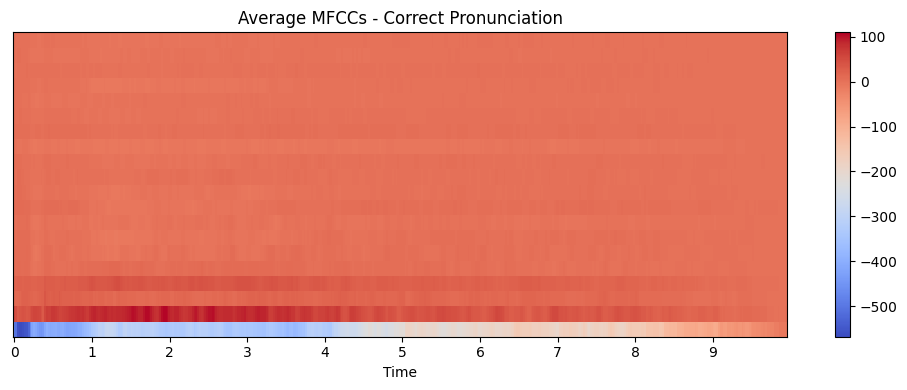

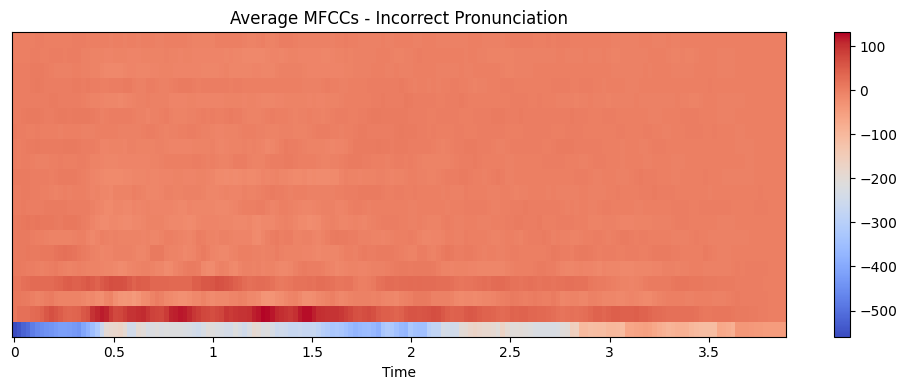

In [22]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to extract features from audio files
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs

# Path to the folders containing audio files
correct_pronunciation_folder = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset"
incorrect_pronunciation_folder = "/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset"

# Function to plot MFCCs
def plot_mfccs(folder, title):
    # List to hold all MFCCs
    mfccs_list = []

    # Iterate over audio files in the folder
    max_frames = 0
    for file_name in os.listdir(folder):
        audio_file = os.path.join(folder, file_name)
        mfccs = extract_features(audio_file)
        mfccs_list.append(mfccs)
        max_frames = max(max_frames, mfccs.shape[1])  # Find the maximum number of frames

    # Pad MFCCs to have the same number of frames
    padded_mfccs_list = [np.pad(mfccs, ((0, 0), (0, max_frames - mfccs.shape[1])), mode='constant') for mfccs in mfccs_list]

    # Calculate the average MFCCs
    mfccs_avg = np.mean(padded_mfccs_list, axis=0)

    # Plot the average MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs_avg, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot MFCCs for correct pronunciation
plot_mfccs(correct_pronunciation_folder, 'Average MFCCs - Correct Pronunciation')

# Plot MFCCs for incorrect pronunciation
plot_mfccs(incorrect_pronunciation_folder, 'Average MFCCs - Incorrect Pronunciation')


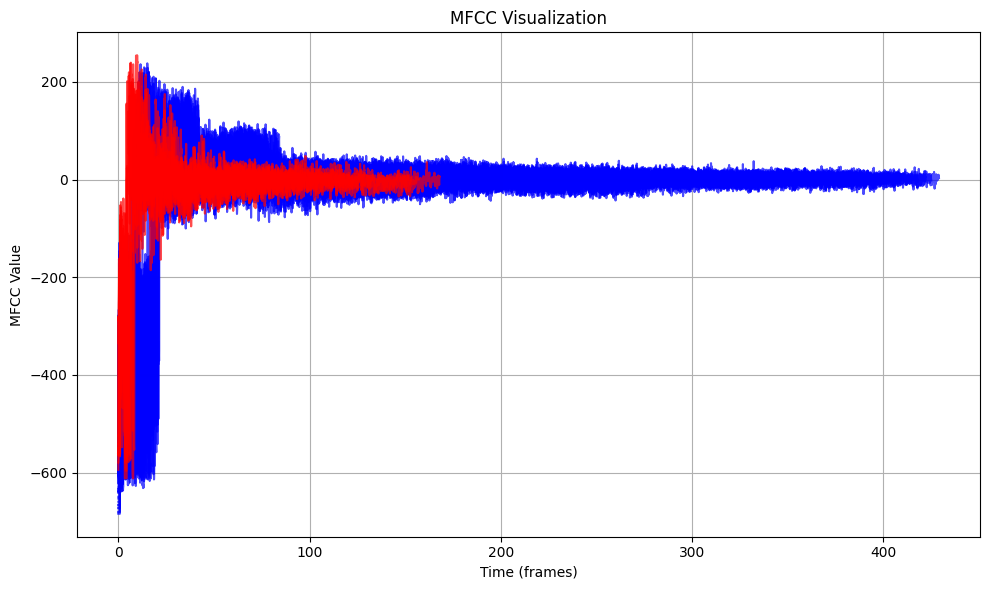

In [23]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to extract features from an audio file
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs

# Function to plot the MFCCs of an audio file with a line plot
def plot_audio(audio_file, ax, color='blue'):
    mfccs = extract_features(audio_file)
    num_frames = mfccs.shape[1]
    time_points = np.linspace(0, num_frames, num=mfccs.size)  # Use mfccs.size as the number of time points
    mfccs_flat = mfccs.flatten()  # Flatten the 2D array
    ax.plot(time_points, mfccs_flat, color=color, alpha=0.7)  # Use a continuous line plot

# Path to the folders containing audio files
correct_audio_folder = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset"
incorrect_audio_folder = "/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset"

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Iterate over correct audio files in the folder
for file_name in os.listdir(correct_audio_folder):
    audio_file = os.path.join(correct_audio_folder, file_name)
    plot_audio(audio_file, ax, color='blue')

# Iterate over incorrect audio files in the folder
for file_name in os.listdir(incorrect_audio_folder):
    audio_file = os.path.join(incorrect_audio_folder, file_name)
    plot_audio(audio_file, ax, color='red')

# Set labels and title
plt.xlabel('Time (frames)')
plt.ylabel('MFCC Value')
plt.title('MFCC Visualization')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


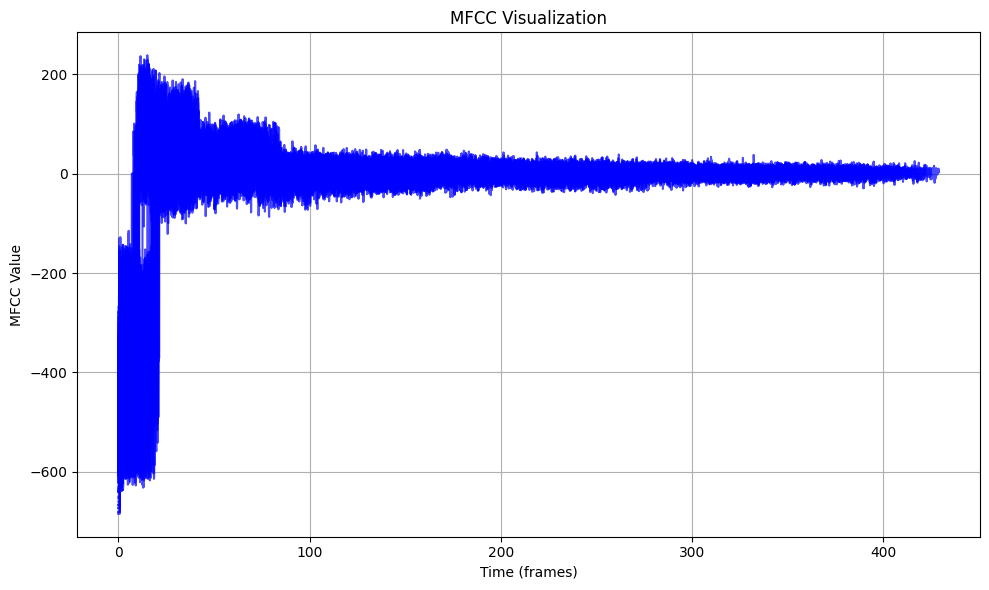

In [24]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to extract features from an audio file
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs

# Function to plot the MFCCs of an audio file with a line plot
def plot_audio(audio_file, ax, color='blue'):
    mfccs = extract_features(audio_file)
    num_frames = mfccs.shape[1]
    time_points = np.linspace(0, num_frames, num=mfccs.size)  # Use mfccs.size as the number of time points
    mfccs_flat = mfccs.flatten()  # Flatten the 2D array
    ax.plot(time_points, mfccs_flat, color=color, alpha=0.7)  # Use a continuous line plot

# Path to the folder containing audio files
audio_folder = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset"

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Iterate over audio files in the folder
for file_name in os.listdir(audio_folder):
    audio_file = os.path.join(audio_folder, file_name)
    plot_audio(audio_file, ax)

# Set labels and title
plt.xlabel('Time (frames)')
plt.ylabel('MFCC Value')
plt.title('MFCC Visualization')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


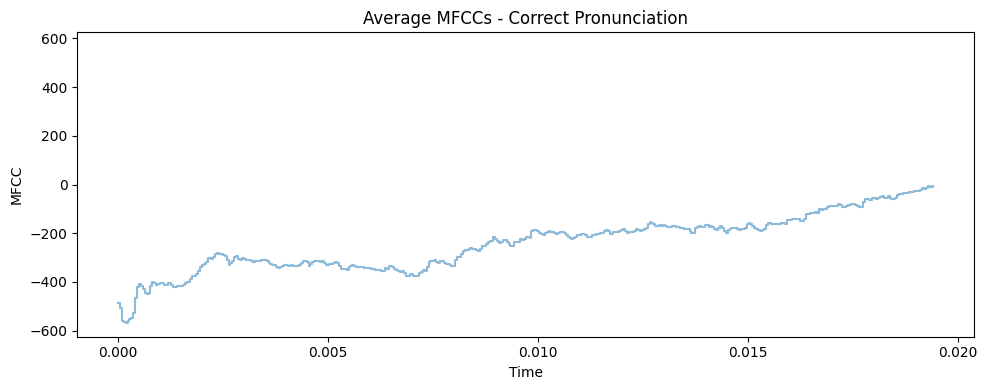

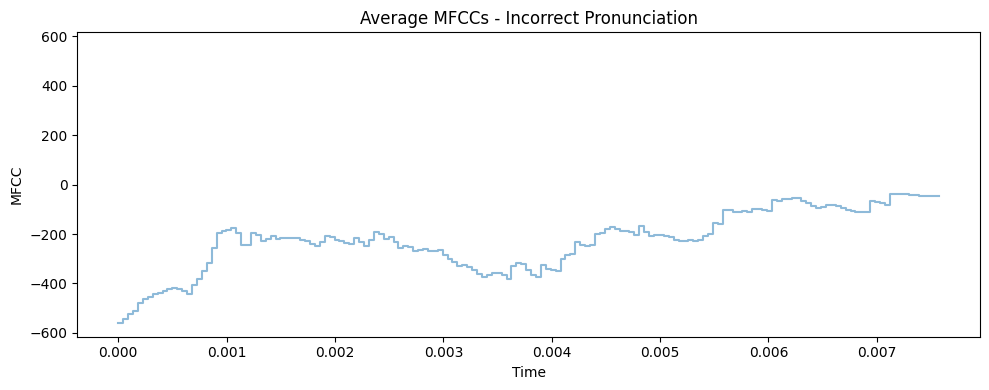

In [25]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to extract features from audio files
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs, sr  # Return MFCCs and sampling rate

# Path to the folders containing audio files
correct_pronunciation_folder = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset"
incorrect_pronunciation_folder = "/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset"

# Function to plot MFCCs
def plot_mfccs(folder, title):
    # List to hold all MFCCs
    mfccs_list = []
    sr_list = []

    # Iterate over audio files in the folder
    max_frames = 0
    for file_name in os.listdir(folder):
        audio_file = os.path.join(folder, file_name)
        mfccs, sr = extract_features(audio_file)
        mfccs_list.append(mfccs)
        sr_list.append(sr)
        max_frames = max(max_frames, mfccs.shape[1])  # Find the maximum number of frames

    # Pad MFCCs to have the same number of frames
    padded_mfccs_list = [np.pad(mfccs, ((0, 0), (0, max_frames - mfccs.shape[1])), mode='constant') for mfccs in mfccs_list]

    # Calculate the average MFCCs
    mfccs_avg = np.mean(padded_mfccs_list, axis=0)

    # Plot the average MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(mfccs_avg, sr=np.mean(sr_list), alpha=0.5)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('MFCC')
    plt.tight_layout()
    plt.show()

# Plot MFCCs for correct pronunciation
plot_mfccs(correct_pronunciation_folder, 'Average MFCCs - Correct Pronunciation')

# Plot MFCCs for incorrect pronunciation
plot_mfccs(incorrect_pronunciation_folder, 'Average MFCCs - Incorrect Pronunciation')


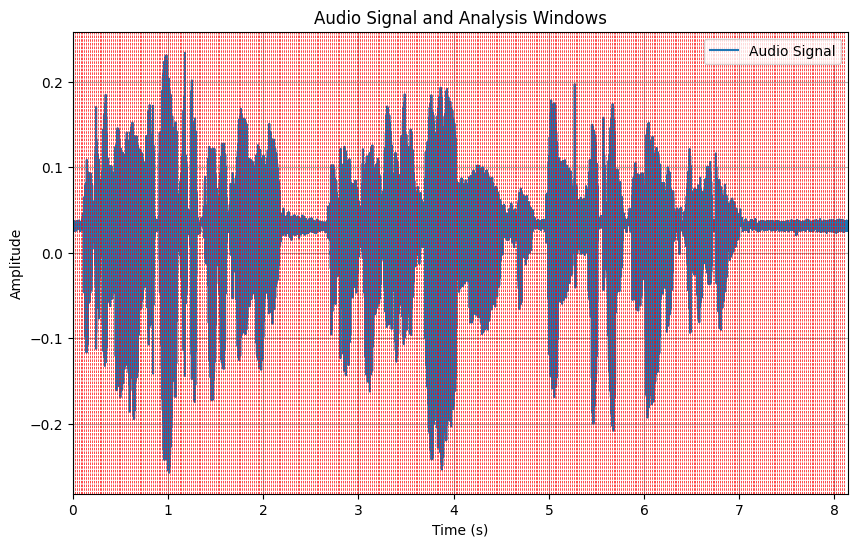

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def helperVisualizeBuffer(audio, windowSize, hopSize, fs):
    # Calculate the number of frames
    numFrames = 1 + int(np.floor((len(audio) - windowSize) / hopSize))

    # Create a time vector for visualization
    timeVector = np.arange(0, len(audio)) / fs

    # Create a time vector for the analysis windows
    analysisTime = np.arange(0, numFrames) * hopSize / fs

    # Plot the audio waveform
    plt.figure(figsize=(10, 6))
    plt.plot(timeVector, audio, label='Audio Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Signal and Analysis Windows')
    plt.xlim([0, timeVector[-1]])

    # Plot the analysis windows
    for t in analysisTime:
        plt.axvline(x=t, color='r', linestyle='--', linewidth=0.5)

    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
audio_file = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_26.wav"  # Replace with your audio file path
audio, fs = librosa.load(audio_file, sr=None)  # Load the audio file
windowSize = int(0.03 * fs)  # 30 ms analysis window
hopSize = int(0.02 * fs)  # 20 ms overlap between adjacent windows
helperVisualizeBuffer(audio, windowSize, hopSize, fs)


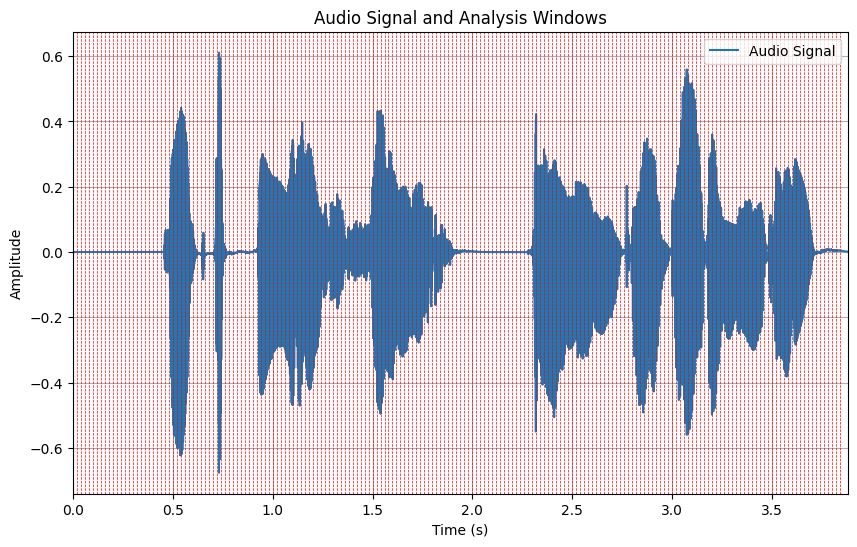

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def helperVisualizeBuffer(audio, windowSize, hopSize, fs):
    # Calculate the number of frames
    numFrames = 1 + int(np.floor((len(audio) - windowSize) / hopSize))

    # Create a time vector for visualization
    timeVector = np.arange(0, len(audio)) / fs

    # Create a time vector for the analysis windows
    analysisTime = np.arange(0, numFrames) * hopSize / fs

    # Plot the audio waveform
    plt.figure(figsize=(10, 6))
    plt.plot(timeVector, audio, label='Audio Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Signal and Analysis Windows')
    plt.xlim([0, timeVector[-1]])

    # Plot the analysis windows
    for t in analysisTime:
        plt.axvline(x=t, color='r', linestyle='--', linewidth=0.5)

    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
audio_file = "/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset/02.wav"  # Replace with your audio file path
audio, fs = librosa.load(audio_file, sr=None)  # Load the audio file
windowSize = int(0.03 * fs)  # 30 ms analysis window
hopSize = int(0.02 * fs)  # 20 ms overlap between adjacent windows
helperVisualizeBuffer(audio, windowSize, hopSize, fs)


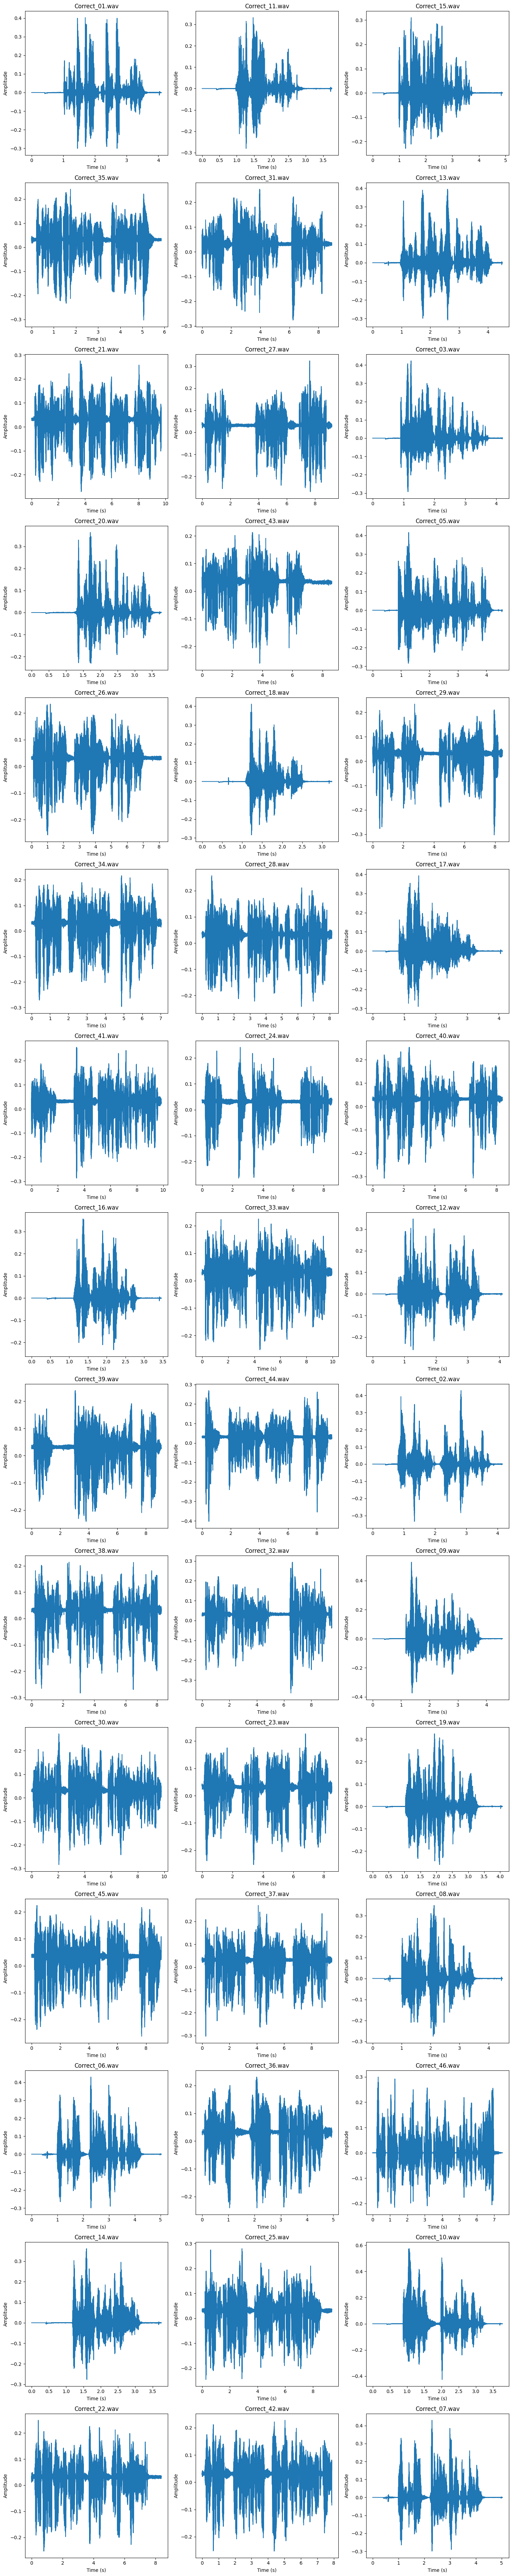

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Function to visualize the audio waveform
def visualize_audio_waveform(audio, fs, ax, title):
    time = np.arange(len(audio)) / fs
    ax.plot(time, audio)
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')

# Path to the folder containing correct pronunciation audio files
correct_pronunciation_folder = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset"

# Create a figure and subplots
num_files = len([f for f in os.listdir(correct_pronunciation_folder) if f.endswith('.wav')])
num_cols = 3  # Number of columns for subplots
num_rows = (num_files + num_cols - 1) // num_cols  # Calculate number of rows
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iterate through audio files and plot waveforms
for i, file_name in enumerate(os.listdir(correct_pronunciation_folder)):
    if file_name.endswith('.wav'):
        audio_file = os.path.join(correct_pronunciation_folder, file_name)
        audio, fs = librosa.load(audio_file, sr=None)  # Load audio file
        row = i // num_cols
        col = i % num_cols
        visualize_audio_waveform(audio, fs, axs[row, col], title=file_name)

# Adjust layout
plt.tight_layout()
plt.show()


In [30]:
import os
import librosa

# Function to extract MFCC features from an audio file
def extract_mfcc(audio_file):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc

# Path to the folder containing audio files
folder_path = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset"

# List to hold the shapes of all MFCC arrays
mfcc_shapes = []

# Iterate through the audio files in the folder
for file_name in os.listdir(folder_path):
    audio_file = os.path.join(folder_path, file_name)
    mfcc = extract_mfcc(audio_file)
    mfcc_shapes.append(mfcc.shape)

# Filter out any empty or incorrectly shaped arrays
valid_mfcc_shapes = [shape for shape in mfcc_shapes if len(shape) == 2]

# Extract the number of frames and MFCC coefficients from the shapes
n_frames_values = [shape[1] for shape in valid_mfcc_shapes]
n_mfcc_values = [shape[0] for shape in valid_mfcc_shapes]

# Calculate the average values
if n_frames_values and n_mfcc_values:
    n_frames = int(np.mean(n_frames_values))
    n_mfcc = int(np.mean(n_mfcc_values))
    print("Average number of frames:", n_frames)
    print("Average number of MFCC coefficients:", n_mfcc)
else:
    print("No valid MFCC arrays found.")


Average number of frames: 288
Average number of MFCC coefficients: 20


In [ ]:
# Define the expected shape of the MFCC arrays
expected_shape = (20, 288)  # Replace n_mfcc and n_frames with the expected values

# Ensure all elements have the same shape
inconsistent_indices = [i for i, mfcc in enumerate(correct_mfccs) if mfcc.shape != expected_shape]

# If there are inconsistencies, investigate the MFCC extraction process
if inconsistent_indices:
    print("Inconsistent MFCC shapes found. Investigate the MFCC extraction process.")
    for idx in inconsistent_indices:
        print(f"Inconsistent shape at index {idx}: {correct_mfccs[idx].shape}")
else:
    print("All MFCC arrays have consistent shapes.")

# Once you've ensured consistent shapes, proceed with the Kolmogorov-Smirnov test
if not inconsistent_indices:
    # Proceed with the Kolmogorov-Smirnov test
    from scipy.stats import ks_2samp
    
    # Create a reference distribution
    reference_distribution = np.random.normal(loc=0, scale=1, size=len(correct_mfccs))

    # Perform Kolmogorov-Smirnov test
    ks_statistic, p_value = ks_2samp(correct_mfccs, reference_distribution)

    # Print the results
    print("Kolmogorov-Smirnov Test:")
    print("KS statistic:", ks_statistic)
    print("p-value:", p_value)


In [ ]:
import os
import librosa

# Function to extract MFCC features from an audio file
def extract_mfcc(audio_file):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc

# Path to the folder containing audio files
folder_path = "/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset"

# List to hold the shapes of all MFCC arrays
mfcc_shapes = []

# Iterate through the audio files in the folder
for file_name in os.listdir(folder_path):
    audio_file = os.path.join(folder_path, file_name)
    mfcc = extract_mfcc(audio_file)
    mfcc_shapes.append(mfcc.shape)

# Filter out any empty or incorrectly shaped arrays
valid_mfcc_shapes = [shape for shape in mfcc_shapes if len(shape) == 2]

# Extract the number of frames and MFCC coefficients from the shapes
n_frames_values = [shape[1] for shape in valid_mfcc_shapes]
n_mfcc_values = [shape[0] for shape in valid_mfcc_shapes]

# Calculate the average values
if n_frames_values and n_mfcc_values:
    n_frames = int(np.mean(n_frames_values))
    n_mfcc = int(np.mean(n_mfcc_values))
    print("Average number of frames:", n_frames)
    print("Average number of MFCC coefficients:", n_mfcc)
else:
    print("No valid MFCC arrays found.")


In [ ]:
# Define the expected shape of the MFCC arrays
expected_shape = (20,117 )  # Replace n_mfcc and n_frames with the expected values

# Ensure all elements have the same shape
inconsistent_indices = [i for i, mfcc in enumerate(incorrect_mfccs) if mfcc.shape != expected_shape]

# If there are inconsistencies, investigate the MFCC extraction process
if inconsistent_indices:
    print("Inconsistent MFCC shapes found. Investigate the MFCC extraction process.")
    for idx in inconsistent_indices:
        print(f"Inconsistent shape at index {idx}: {incorrect_mfccs[idx].shape}")
else:
    print("All MFCC arrays have consistent shapes.")

# Once you've ensured consistent shapes, proceed with the Kolmogorov-Smirnov test
if not inconsistent_indices:
    # Proceed with the Kolmogorov-Smirnov test
    from scipy.stats import ks_2samp
    
    # Create a reference distribution
    reference_distribution = np.random.normal(loc=0, scale=1, size=len(correct_mfccs))

    # Perform Kolmogorov-Smirnov test
    ks_statistic, p_value = ks_2samp(incorrect_mfccs, reference_distribution)

    # Print the results
    print("Kolmogorov-Smirnov Test:")
    print("KS statistic:", ks_statistic)
    print("p-value:", p_value)


In [ ]:
import os
import librosa
import numpy as np

# Function to extract MFCC features from audio files
def extract_mfcc(audio_file, sr=22050, n_mfcc=13, hop_length=512, n_fft=2048):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=sr)
    
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
    
    return mfccs

# Path to the folders containing correct and incorrect audio files
correct_audio_folder = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset"
incorrect_audio_folder = "/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset"

# Extract MFCC features for correct and incorrect audio files
correct_mfccs = [extract_mfcc(os.path.join(correct_audio_folder, file_name)) for file_name in os.listdir(correct_audio_folder)]
incorrect_mfccs = [extract_mfcc(os.path.join(incorrect_audio_folder, file_name)) for file_name in os.listdir(incorrect_audio_folder)]

# Quality control: Check MFCC shapes
correct_shapes = [mfcc.shape for mfcc in correct_mfccs]
incorrect_shapes = [mfcc.shape for mfcc in incorrect_mfccs]

# Ensure all MFCC shapes are consistent
if len(set(correct_shapes)) != 1 or len(set(incorrect_shapes)) != 1:
    print("Inconsistent MFCC shapes found. Investigate the MFCC extraction process.")
else:
    print("MFCC shapes consistent. Proceed with analysis.")



In [ ]:
import os
import librosa

# Define the folder containing the audio files
folder_path = '/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset'

# Define a function to extract MFCC features from an audio file
def extract_mfcc(audio_file, sr=22050, n_mfcc=20, hop_length=512, n_fft=2048):
    """
    Extracts Mel-frequency cepstral coefficients (MFCCs) from an audio file.

    Parameters:
    - audio_file: str, path to the audio file
    - sr: int, sampling rate (default: 22050 Hz)
    - n_mfcc: int, number of MFCCs to extract (default: 20)
    - hop_length: int, number of samples between successive frames (default: 512)
    - n_fft: int, length of the FFT window (default: 2048)

    Returns:
    - mfccs: np.ndarray, MFCCs of shape (n_mfcc, n_frames)
    """
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=sr)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)

    return mfccs

# Loop over all audio files in the folder and extract MFCC features
for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):  # Process only .wav files
        audio_file = os.path.join(folder_path, file_name)
        mfccs = extract_mfcc(audio_file)
        print(f"Extracted MFCC features from {file_name}: {mfccs.shape}")


In [ ]:
import os

# Define the folder containing the audio files
folder_path = '/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset'

# Define a function to extract MFCC features from an audio file
def extract_mfcc(audio_file, sr=22050, n_mfcc=20, hop_length=512, n_fft=2048):
    """
    Extracts Mel-frequency cepstral coefficients (MFCCs) from an audio file.

    Parameters:
    - audio_file: str, path to the audio file
    - sr: int, sampling rate (default: 22050 Hz)
    - n_mfcc: int, number of MFCCs to extract (default: 20)
    - hop_length: int, number of samples between successive frames (default: 512)
    - n_fft: int, length of the FFT window (default: 2048)

    Returns:
    - mfccs: np.ndarray, MFCCs of shape (n_mfcc, n_frames)
    """
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=sr)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)

    return mfccs

# Loop over all audio files in the folder and extract MFCC features
for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):  # Process only .wav files
        audio_file = os.path.join(folder_path, file_name)
        mfccs = extract_mfcc(audio_file)
        print(f"Extracted MFCC features from {file_name}: {mfccs.shape}")


In [ ]:
!pip install python_speech_features


# MFCC Feature Extraction for SVM Model 2

In [ ]:
import numpy as np
import os
from python_speech_features import mfcc
import scipy.io.wavfile as wav

# Define file paths for correct and incorrect audio files
correct_audio_folder = "/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset"
incorrect_audio_folder = "/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset"

# Function to extract MFCC features from an audio file
def extract_mfcc(file_path):
    rate, signal = wav.read(file_path)
    mfcc_features = mfcc(signal, rate)
    return mfcc_features

# Extract MFCC features and create corresponding labels for correct audio files
correct_mfcc_features = []
correct_labels = []
for file_name in os.listdir(correct_audio_folder):
    file_path = os.path.join(correct_audio_folder, file_name)
    mfcc_features = extract_mfcc(file_path)
    correct_mfcc_features.append(mfcc_features)
    correct_labels.append(1)  # Label 1 for correct audio files

# Extract MFCC features and create corresponding labels for incorrect audio files
incorrect_mfcc_features = []
incorrect_labels = []
for file_name in os.listdir(incorrect_audio_folder):
    file_path = os.path.join(incorrect_audio_folder, file_name)
    mfcc_features = extract_mfcc(file_path)
    incorrect_mfcc_features.append(mfcc_features)
    incorrect_labels.append(0)  # Label 0 for incorrect audio files




In [ ]:
# Check the shapes of the extracted MFCC features
print("MFCC Shapes:")
print("Correct Audio Files:")
for i, mfcc_features in enumerate(correct_mfcc_features):
    print(f"  {i + 1}. {mfcc_features.shape}")
print("Incorrect Audio Files:")
for i, mfcc_features in enumerate(incorrect_mfcc_features):
    print(f"  {i + 1}. {mfcc_features.shape}")


# MFCC feature Support Vector Machine

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Find the maximum number of frames among all MFCC features
max_frames = max(max(mfcc_features.shape[0] for mfcc_features in correct_mfcc_features),
                 max(mfcc_features.shape[0] for mfcc_features in incorrect_mfcc_features))

# Pad or truncate the MFCC features to the maximum number of frames
padded_correct_mfcc_features = [np.pad(mfcc_features,
((0, max_frames - mfcc_features.shape[0]), (0, 0)), mode='constant') 
for mfcc_features in correct_mfcc_features]
padded_incorrect_mfcc_features = [np.pad(mfcc_features, 
((0, max_frames - mfcc_features.shape[0]), (0, 0)), mode='constant')
for mfcc_features in incorrect_mfcc_features]

# Concatenate MFCC features and corresponding labels
X = np.vstack((padded_correct_mfcc_features, padded_incorrect_mfcc_features))
y = np.hstack((correct_labels, incorrect_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)



In [ ]:
print(y)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Support Vector Classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train_scaled.reshape(X_train_scaled.shape[0], -1), y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled.reshape(X_test_scaled.shape[0], -1))

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
import joblib

In [ ]:
# Save the trained model to a file
joblib.dump(svm_classifier, 'svm_model.pkl')

**#Pickle File **

In [ ]:
#import os

# File path to delete
#file_path = "/kaggle/working/scaler.pkl"

# Check if the file exists before attempting to delete it
#if os.path.exists(file_path):
    #os.remove(file_path)
    #print("File deleted successfully")
#else:
    #print("File does not exist")


# # SVM Model 03 -Spectrum Feature

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.transform import resize

def extract_spectrogram(audio_file, n_fft=2048, hop_length=512, target_shape=(128, 128)):
    y, sr = librosa.load(audio_file, sr=None)
    spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    resized_spectrogram = resize(spectrogram, target_shape)
    return resized_spectrogram

directory_correct = '/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset'
directory_incorrect = '/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset'

all_features = []
all_labels = []

# Extract features for correct pronunciations
for filename in os.listdir(directory_correct):
    if filename.endswith('.wav'):
        audio_file = os.path.join(directory_correct, filename)
        spectrogram = extract_spectrogram(audio_file)
        all_features.append(spectrogram)
        all_labels.append('correct')

# Extract features for incorrect pronunciations
for filename in os.listdir(directory_incorrect):
    if filename.endswith('.wav'):
        audio_file = os.path.join(directory_incorrect, filename)
        spectrogram = extract_spectrogram(audio_file)
        all_features.append(spectrogram)
        all_labels.append('incorrect')

# Convert lists to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)



In [ ]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)



In [ ]:
# Flatten and normalize spectrogram features
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Train SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred_train = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

y_pred_test = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Flatten and normalize spectrogram features
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Train SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred_train = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

y_pred_test = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

**#Spectrogram CNN Model can be overfitted!So I go to MFCCS features with Model training**

**#Ignore the Spectrogram feature extrcaing **

In [ ]:
import os
import librosa
import numpy as np

def extract_spectrogram(audio_file, n_fft=2048, hop_length=512):
    y, sr = librosa.load(audio_file, sr=None)
    spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    return spectrogram

# Path to the directory containing your audio files
directory_correct = '/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset'
directory_incorrect = '/kaggle/input/german-pronounciation/All Audios/Incorrect_Audio_Dataset'

# Extract spectrograms from correct audios
max_shape_correct = (0, 0)
for filename in os.listdir(directory_correct):
    if filename.endswith('.wav'):
        audio_file = os.path.join(directory_correct, filename)
        spectrogram = extract_spectrogram(audio_file)
        max_shape_correct = tuple(max(x) for x in zip(max_shape_correct, spectrogram.shape))

# Extract spectrograms from incorrect audios
max_shape_incorrect = (0, 0)
for filename in os.listdir(directory_incorrect):
    if filename.endswith('.wav'):
        audio_file = os.path.join(directory_incorrect, filename)
        spectrogram = extract_spectrogram(audio_file)
        max_shape_incorrect = tuple(max(x) for x in zip(max_shape_incorrect, spectrogram.shape))

# Determine the maximum shape across both correct and incorrect spectrograms
target_shape = tuple(max(x) for x in zip(max_shape_correct, max_shape_incorrect))
print("Target Shape:", target_shape)


In [ ]:
import os
import librosa
import numpy as np

def extract_spectrogram(audio_file, n_fft=2048, hop_length=512):
    y, sr = librosa.load(audio_file, sr=None)
    spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    return spectrogram

# Path to the directory containing correct audio files
directory_correct = '/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset'

# Initialize variable to store maximum shape of correct spectrograms
max_shape_correct = (0, 0)

# Extract spectrograms from correct audios
for filename in os.listdir(directory_correct):
    if filename.endswith('.wav'):
        audio_file = os.path.join(directory_correct, filename)
        spectrogram = extract_spectrogram(audio_file)
        max_shape_correct = tuple(max(x) for x in zip(max_shape_correct, spectrogram.shape))

# Choose the maximum shape of correct spectrograms as the target shape
target_shape = max_shape_correct
print("Target Shape:", target_shape)


# **#Deep learning model with MFCC features training**

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file, num_mfcc=13):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    return np.concatenate((mfccs_mean, mfccs_std))

# Define directories
directory = '/kaggle/input/german-pronounciation/All Audios'
correct_directory = os.path.join(directory, 'Correct_Audio_dataset')
incorrect_directory = os.path.join(directory, 'Incorrect_Audio_Dataset')

# Extract MFCC features for correct pronunciations
correct_features = []
correct_labels = []
for filename in os.listdir(correct_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(correct_directory, filename)
        features = extract_mfcc_features(audio_file)
        correct_features.append(features)
        correct_labels.append(1)  # Use 1 for correct pronunciations

# Extract MFCC features for incorrect pronunciations
incorrect_features = []
incorrect_labels = []
for filename in os.listdir(incorrect_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(incorrect_directory, filename)
        features = extract_mfcc_features(audio_file)
        incorrect_features.append(features)
        incorrect_labels.append(0)  # Use 0 for incorrect pronunciations

# Combine features and labels
X = np.vstack((correct_features, incorrect_features))
y = np.hstack((correct_labels, incorrect_labels))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)






In [ ]:
# Create the model
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()


In [ ]:

# Train the model
history = cnn_model.fit(X_train_scaled[..., np.newaxis], y_train, epochs=100, batch_size=20, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_scaled[..., np.newaxis], y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Save the trained model
model_path = '/kaggle/working/cnn_model.h5'
cnn_model.save(model_path)
print("Model saved successfully:", model_path)

In [ ]:
# Access training accuracy from history object
train_accuracy = history.history['accuracy']

# Print the final training accuracy
final_train_accuracy = train_accuracy[-1]
print("Final Training Accuracy:", final_train_accuracy)


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Doing Predictions /Testing using MFCC featue CNN model**

In [ ]:
!pip install joblib

In [ ]:
import librosa
import numpy as np

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file, num_mfcc=13):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    return np.concatenate((mfccs_mean, mfccs_std))

# Load the audio file
audio_file_path = '/kaggle/input/myuuuu/WhatsApp Audio 2024-04-23 at 13.34.16(1).wav'
features = extract_mfcc_features(audio_file_path)

# Standardize the features using the scaler fitted during training
scaled_features = scaler.transform(features.reshape(1, -1))

# Use the trained model to predict the pronunciation accuracy
prediction = cnn_model.predict(scaled_features)

# Output the prediction
if prediction > 0.9:
    print("The pronunciation is correct.")
else:
    print("The pronunciation is incorrect.")


In [ ]:
# Load the audio file
audio_file_path = '/kaggle/input/myuuuu/WhatsApp Audio 2024-04-23 at 13.34.16(1).wav'
features = extract_mfcc_features(audio_file_path)


# Standardize the features using the scaler fitted during training
scaled_features = scaler.transform(features.reshape(1, -1))

# Use the trained model to predict the pronunciation accuracy
prediction = cnn_model.predict(scaled_features)

# Extract the probability of the predicted class (assuming binary classification)
prediction_prob = prediction[0][0] if prediction.ndim == 2 else prediction[0]


# Define the thresholds for different categories
incorrect_threshold = 0.4
partly_correct_threshold = 0.9

# Check the predicted probability and assign marks accordingly
if prediction_prob <= incorrect_threshold:
    score = prediction_prob * 40  # Marks less than 40 for incorrect pronunciation
    feedback = "The pronunciation is incorrect."
elif prediction_prob <= partly_correct_threshold:
    score = 40 + (prediction_prob - incorrect_threshold) / (partly_correct_threshold - incorrect_threshold) * 50  # Marks between 40 and 90 for partly correct pronunciation
    feedback = "The pronunciation is partly correct."
else:
    score = 90 + (prediction_prob - partly_correct_threshold) / (1 - partly_correct_threshold) * 10  # Marks between 90 and 100 for excellent pronunciation
    feedback = "The pronunciation is excellent."

# Output the score and feedback
print("Pronunciation Score: {:.2f}/100".format(score))
print("Feedback: {}".format(feedback))

# **ANN model** MFCC Features

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:


# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file, num_mfcc=13):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    return np.concatenate((mfccs_mean, mfccs_std))






In [ ]:
# Define directories
directory = '/kaggle/input/german-pronounciation/All Audios'
correct_directory = os.path.join(directory, 'Correct_Audio_dataset')
incorrect_directory = os.path.join(directory, 'Incorrect_Audio_Dataset')

# Extract MFCC features for correct pronunciations
correct_features = []
correct_labels = []
for filename in os.listdir(correct_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(correct_directory, filename)
        features = extract_mfcc_features(audio_file)
        correct_features.append(features)
        correct_labels.append(1)  # Use 1 for correct pronunciations

# Extract MFCC features for incorrect pronunciations
incorrect_features = []
incorrect_labels = []
for filename in os.listdir(incorrect_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(incorrect_directory, filename)
        features = extract_mfcc_features(audio_file)
        incorrect_features.append(features)
        incorrect_labels.append(0)  # Use 0 for incorrect pronunciations

In [ ]:
# Combine features and labels
X = np.vstack((correct_features, incorrect_features))
y = np.hstack((correct_labels, incorrect_labels))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
# Create the ANN model
ann_model_mfcc = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model_mfcc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Print model summary
ann_model_mfcc.summary()

# Train the model
history_ann_mfcc = ann_model_mfcc.fit(X_train_scaled, y_train, epochs=300, batch_size=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss_ann_mfcc, test_accuracy_ann_mfcc = ann_model_mfcc.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss_ann_mfcc)
print("Test Accuracy:", test_accuracy_ann_mfcc)

In [ ]:
ann_model_mfcc.save("ann_model_mfcc.h5")

In [ ]:
# Specify the path to the file you want to delete
file_path = '/kaggle/working/model.pth'  # Replace 'file_to_delete.txt' with the name of your file

# Check if the file exists
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"File '{file_path}' has been deleted.")
else:
    print(f"File '{file_path}' does not exist.")


In [ ]:
# Load the audio file
audio_file_path = '/kaggle/input/myuuuu/WhatsApp Audio 2024-04-23 at 13.34.16(1).wav'
features = extract_mfcc_features(audio_file_path)


# Standardize the features using the scaler fitted during training
scaled_features = scaler.transform(features.reshape(1, -1))

# Use the trained model to predict the pronunciation accuracy
prediction = ann_model_mfcc.predict(scaled_features)

# Extract the probability of the predicted class (assuming binary classification)
prediction_prob = prediction[0][0] if prediction.ndim == 2 else prediction[0]


# Define the thresholds for different categories
incorrect_threshold = 0.4
partly_correct_threshold = 0.9

# Check the predicted probability and assign marks accordingly
if prediction_prob <= incorrect_threshold:
    score = prediction_prob * 40  # Marks less than 40 for incorrect pronunciation
    feedback = "The pronunciation is incorrect."
elif prediction_prob <= partly_correct_threshold:
    score = 40 + (prediction_prob - incorrect_threshold) / (partly_correct_threshold - incorrect_threshold) * 50  # Marks between 40 and 90 for partly correct pronunciation
    feedback = "The pronunciation is partly correct."
else:
    score = 90 + (prediction_prob - partly_correct_threshold) / (1 - partly_correct_threshold) * 10  # Marks between 90 and 100 for excellent pronunciation
    feedback = "The pronunciation is excellent."

# Output the score and feedback
print("Pronunciation Score: {:.2f}/100".format(score))
print("Feedback: {}".format(feedback))

# # MFCC ANN model using pytorch

In [ ]:
import os
import librosa
import numpy as np
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file, num_mfcc=13):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    return np.concatenate((mfccs_mean, mfccs_std))

# Define directories
directory = '/kaggle/input/german-pronounciation/All Audios'
correct_directory = os.path.join(directory, 'Correct_Audio_dataset')
incorrect_directory = os.path.join(directory, 'Incorrect_Audio_Dataset')

# Extract MFCC features for correct pronunciations
correct_features = []
correct_labels = []
for filename in os.listdir(correct_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(correct_directory, filename)
        features = extract_mfcc_features(audio_file)
        correct_features.append(features)
        correct_labels.append(1)  # Use 1 for correct pronunciations
        
# Extract MFCC features for incorrect pronunciations
incorrect_features = []
incorrect_labels = []
for filename in os.listdir(incorrect_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(incorrect_directory, filename)
        features = extract_mfcc_features(audio_file)
        incorrect_features.append(features)
        incorrect_labels.append(0)  # Use 0 for incorrect pronunciations




In [ ]:


# Combine features and labels
X = np.vstack((correct_features, incorrect_features))
y = np.hstack((correct_labels, incorrect_labels))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the ANN model using PyTorch
class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x



In [ ]:
# Initialize the model
input_size = X_train_scaled.shape[1]
ann_model_mfcc = ANNModel(input_size)
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(ann_model_mfcc.parameters())
# Define function for training the model
def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=300, batch_size=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i in range(0, len(X_train), batch_size):
            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size]
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(X_train)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Train the model
train_model(ann_model_mfcc, criterion, optimizer, X_train_tensor, y_train_tensor)

# Define function for evaluating the model
def evaluate_model(model, criterion, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        loss = criterion(outputs, y_test.view(-1, 1))
        predicted = torch.round(outputs)
        accuracy = (predicted == y_test.view(-1, 1)).sum().item() / len(y_test)
        print(f'Test Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}')

# Evaluate the model on the test set
evaluate_model(ann_model_mfcc, criterion, X_test_tensor, y_test_tensor)

# Tesing using ANN pytorch model

In [ ]:
import os
import librosa
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file, num_mfcc=13):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    return np.concatenate((mfccs_mean, mfccs_std))

# Function to provide feedback based on pronunciation score
def provide_feedback(pronunciation_score):
    if pronunciation_score >= 80:
        return "Your pronunciation is excellent!"
    elif 60 < pronunciation_score < 80:
        return "Your pronunciation is good, but there's room for improvement."
    elif 40 <= pronunciation_score <= 60:
        return "Your pronunciation needs improvement."
    else:
        return "Your pronunciation needs significant improvement. Consider seeking assistance."

# Path to the directory containing the audio file
audio_file_path = '/kaggle/input/myuuuu/WhatsApp Audio 2024-04-23 at 13.34.16(1).wav'

# Extract MFCC features
features = extract_mfcc_features(audio_file_path)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.reshape(1, -1))

# Convert numpy array to PyTorch tensor
features_tensor = torch.tensor(features_scaled, dtype=torch.float32)

# Make prediction using the loaded PyTorch model
output = ann_model_mfcc(features_tensor)
prediction = torch.round(output).item()

# Score pronunciation level
# You can implement the scoring function here based on your specific criteria
# For this example, let's assume the pronunciation score is the model's output
pronunciation_score = output.item() * 100  # Multiplying by 100 to get a score out of 100

# Provide feedback to the speaker based on pronunciation score and prediction
feedback = provide_feedback(pronunciation_score)
print("Pronunciation Score (out of 100):", round(pronunciation_score, 2))
print("Model Prediction:", prediction)
print("Feedback:", feedback)



In [ ]:
import os
import librosa
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file, num_mfcc=13):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    return np.concatenate((mfccs_mean, mfccs_std))

# Define directories
directory = '/kaggle/input/german-pronounciation/All Audios'
correct_directory = os.path.join(directory, 'Correct_Audio_dataset')
incorrect_directory = os.path.join(directory, 'Incorrect_Audio_Dataset')

# Extract MFCC features for correct pronunciations
correct_features = []
correct_labels = []
for filename in os.listdir(correct_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(correct_directory, filename)
        features = extract_mfcc_features(audio_file)
        correct_features.append(features)
        correct_labels.append(1)  # Use 1 for correct pronunciations

# Extract MFCC features for incorrect pronunciations
incorrect_features = []
incorrect_labels = []
for filename in os.listdir(incorrect_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(incorrect_directory, filename)
        features = extract_mfcc_features(audio_file)
        incorrect_features.append(features)
        incorrect_labels.append(0)  # Use 0 for incorrect pronunciations

# Combine features and labels
X = np.vstack((correct_features, incorrect_features))
y = np.hstack((correct_labels, incorrect_labels))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape to column vector
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)    # Reshape to column vector

# Define the ANN model using PyTorch
class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model
input_size = X_train_scaled.shape[1]
torch_ann_model = ANNModel(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(torch_ann_model.parameters(), lr=0.001)  # Adjust learning rate if needed

# Define function for training the model
def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=300, batch_size=32):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i in range(0, len(X_train), batch_size):
            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size]

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(X_train)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Train the model
train_model(torch_ann_model, criterion, optimizer, X_train_tensor, y_train_tensor)

# Define function for evaluating the model
def evaluate_model(model, criterion, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        loss = criterion(outputs, y_test)
        predicted = torch.round(outputs)
        accuracy = (predicted == y_test).sum().item() / len(y_test)
        print(f'Test Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}')

# Evaluate the model on the test set
evaluate_model(torch_ann_model, criterion, X_test_tensor, y_test_tensor)

# Save the entire model
torch.save(torch_ann_model, "modelcnn.pth")


In [ ]:
!pip install scikit-learn --upgrade


# MFCC,Chromo Festures SVM model

In [35]:
import os
import librosa
import numpy as np

def extract_features(audio_file, n_mfcc=13, n_chroma=12, n_mels=128):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC (Mel-frequency cepstral coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Extract spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)

    # Extract mel-scaled spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)

    # Extract zero-crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

    # Calculate statistical features (e.g., mean, standard deviation)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    spectral_contrast_std = np.std(spectral_contrast, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)
    mel_spectrogram_mean = np.mean(mel_spectrogram, axis=1)
    mel_spectrogram_std = np.std(mel_spectrogram, axis=1)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_std = np.std(zero_crossing_rate)

     # Combine all features into a single feature vector
    features = np.concatenate([
        mfccs_mean, mfccs_std,
        spectral_contrast_mean, spectral_contrast_std,
        chroma_mean, chroma_std,
        mel_spectrogram_mean, mel_spectrogram_std,
        [zero_crossing_rate_mean, zero_crossing_rate_std]
    ])

    return features


In [36]:
# Path to the directory containing audio files
directory = '/kaggle/input/german-pronounciation/All Audios'

# Initialize lists to store features and labels
all_features = []
all_labels = []

# Process audio files in correct subfolder
correct_directory = os.path.join(directory, 'Correct_Audio_dataset')
for filename in os.listdir(correct_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(correct_directory, filename)
        features = extract_features(audio_file)
        all_features.append(features)
        all_labels.append('correct')

# Process audio files in incorrect subfolder
incorrect_directory = os.path.join(directory, 'Incorrect_Audio_Dataset')
for filename in os.listdir(incorrect_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(incorrect_directory, filename)
        features = extract_features(audio_file)
        all_features.append(features)
        all_labels.append('incorrect')

# Convert lists to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)



In [ ]:
print(all_features)

In [ ]:
print(all_labels)

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM model
svm_model2 = SVC(kernel='rbf', random_state=24) 
# Train the model
svm_model2.fit(X_train_scaled, y_train)

# Evaluate the model
svm_accuracy = svm_model2.score(X_test_scaled, y_test)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 1.0


In [38]:
import h5py

# Save the SVM model as an HDF5 file
with h5py.File("svm_model.h5", "w") as f:
    f.create_dataset("support_vectors", data=svm_model2.support_vectors_)
    f.create_dataset("dual_coef", data=svm_model2.dual_coef_)
    f.create_dataset("intercept", data=svm_model2.intercept_)
    f.create_dataset("n_support", data=svm_model2.n_support_)
    f.attrs["kernel"] = svm_model2.kernel
    f.attrs["probability"] = svm_model2.probability
    # You can add more attributes and parameters as needed


In [39]:
import joblib

# Save the SVM model as a pickle file
joblib.dump(svm_model2, "svm2_model.pkl")

['svm2_model.pkl']

In [40]:
import joblib


# Load the trained SVM model
svm_model = joblib.load("svm2_model.pkl")

# Path to the new audio file you want to test
test_audio_file = '/kaggle/input/myuuuu/WhatsApp Audio 2024-04-23 at 13.34.16(1).wav'

# Extract features from the new audio file
test_features = extract_features(test_audio_file)

# Scale the extracted features using the same scaler used during training
test_features_scaled = scaler.transform(np.array([test_features]))

# Use the trained SVM model to predict the pronunciation
prediction = svm_model.predict(test_features_scaled)

# Print the prediction
print("Prediction:", prediction)

Prediction: ['correct']


In [41]:
# Load the trained SVM model
svm_model = joblib.load("svm2_model.pkl")

# Path to the new audio file you want to test
test_audio_file = '/kaggle/input/german-pronounciation/All Audios/Correct_Audio_dataset/Correct_27.wav'
# Extract features from the new audio file
test_features = extract_features(test_audio_file)

# Scale the extracted features using the same scaler used during training
test_features_scaled = scaler.transform(np.array([test_features]))

# Use the trained SVM model to obtain the decision score
decision_score = svm_model.decision_function(test_features_scaled)

# Define the mapping function to map decision score to a range from 0 to 100
# Assuming the decision score ranges from -5 to 5, and you want to map it to a range from 0 to 100
def map_to_0_100(score):
    min_score = -5
    max_score = 5
    return max(0, min(100, (score - min_score) / (max_score - min_score) * 100))

# Map the decision score to a range from 0 to 100 using the defined function
mapped_score = map_to_0_100(decision_score)

# Define feedback based on the mapped score
if mapped_score < 20:
    feedback = "Poor pronunciation"
elif 20 <= mapped_score < 40:
    feedback = "Fair pronunciation"
elif 40 <= mapped_score < 60:
    feedback = "Good pronunciation"
elif 60 <= mapped_score < 80:
    feedback = "Very good pronunciation"
else:
    feedback = "Excellent pronunciation"

# Print the mapped score and feedback
print("Pronunciation Score (out of 100):", mapped_score)
print("Feedback:", feedback)


Pronunciation Score (out of 100): [40.00181699]
Feedback: Good pronunciation


In [42]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels (convert labels to numerical values)
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels_encoded, test_size=0.2, random_state=24)

# Define a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1/6 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.5000 - loss: 17.7337

I0000 00:00:1714944465.568391     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 695ms/step - accuracy: 0.5329 - loss: 12.6949 - val_accuracy: 1.0000 - val_loss: 2.8662e-09
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7089 - loss: 5.7512 - val_accuracy: 1.0000 - val_loss: 2.2606e-13
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7774 - loss: 4.1462 - val_accuracy: 1.0000 - val_loss: 1.5680e-15
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9043 - loss: 2.6234 - val_accuracy: 1.0000 - val_loss: 3.4683e-14
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9341 - loss: 1.5237 - val_accuracy: 1.0000 - val_loss: 1.9508e-12
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7664 - loss: 4.6122 - val_accuracy: 1.0000 - val_loss: 9.3288e-11
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8965 - loss: 0.3738 - val_accuracy: 1.0000 - val_loss: 3.7870e-12
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8467 - loss: 3.1984 - val_accuracy: 1.0000 

In [44]:
# Save the trained model
# Save the trained model with the '.h5' extension
model.save("neural_network_model.h5")



In [46]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Function to extract features from an audio file
def extract_features(audio_file, n_mfcc=13, n_chroma=12, n_mels=128):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    spectral_contrast_std = np.std(spectral_contrast, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)
    mel_spectrogram_mean = np.mean(mel_spectrogram, axis=1)
    mel_spectrogram_std = np.std(mel_spectrogram, axis=1)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_std = np.std(zero_crossing_rate)
    features = np.concatenate([
        mfccs_mean, mfccs_std,
        spectral_contrast_mean, spectral_contrast_std,
        chroma_mean, chroma_std,
        mel_spectrogram_mean, mel_spectrogram_std,
        [zero_crossing_rate_mean, zero_crossing_rate_std]
    ])
    return features

# Load the trained neural network model
model = tf.keras.models.load_model("/kaggle/working/neural_network_model.h5")

# Path to the new audio file you want to test
test_audio_file = '/kaggle/input/myuuuu/WhatsApp Audio 2024-04-23 at 13.34.16.wav'

# Extract features from the new audio file
test_features = extract_features(test_audio_file)

# Scale the extracted features using the same scaler used during training
scaler = StandardScaler()  # Assuming you used StandardScaler during training
scaler.fit(all_features)   # Assuming all_features contains the training data
test_features_scaled = scaler.transform(np.array([test_features]))

# Use the trained model to predict the pronunciation quality
prediction = model.predict(test_features_scaled)

# Interpret the prediction result
pronunciation_quality = "Good" if prediction >= 0.1 else "Poor"

print("Pronunciation Quality:", pronunciation_quality)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Pronunciation Quality: Poor


In [51]:
print("Shape of all_features array:", all_features.shape)


Shape of all_features array: (57, 336)


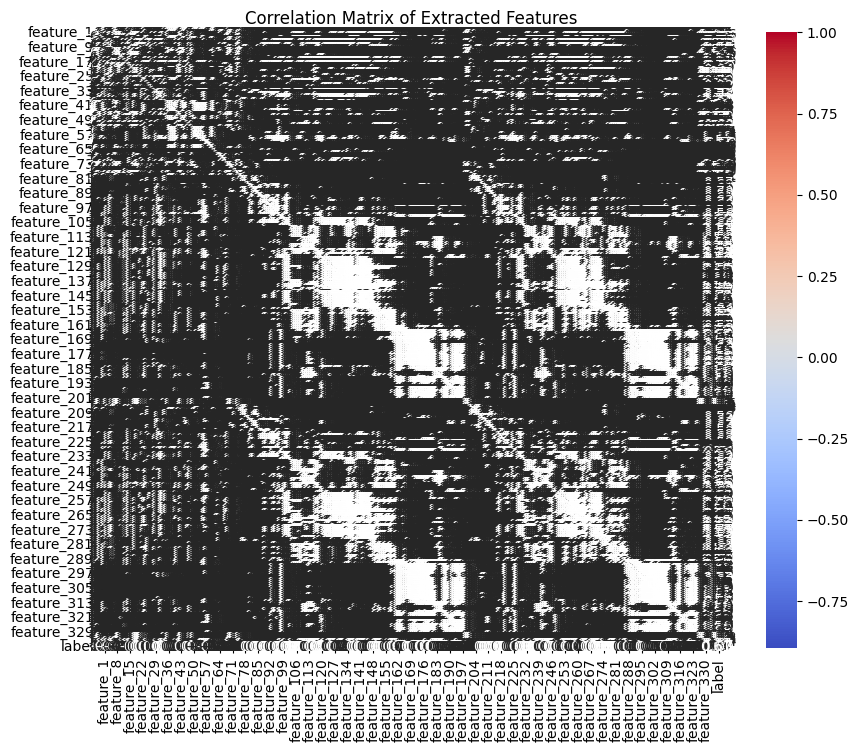

In [54]:
import os
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_features(audio_file, n_mfcc=20, n_chroma=12, n_mels=128):
    y, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    spectral_contrast_std = np.std(spectral_contrast, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)
    mel_spectrogram_mean = np.mean(mel_spectrogram, axis=1)
    mel_spectrogram_std = np.std(mel_spectrogram, axis=1)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_std = np.std(zero_crossing_rate)
    features = np.concatenate([
        mfccs_mean, mfccs_std,
        spectral_contrast_mean, spectral_contrast_std,
        chroma_mean, chroma_std,
        mel_spectrogram_mean, mel_spectrogram_std,
        [zero_crossing_rate_mean, zero_crossing_rate_std]
    ])
    return features

# Path to the directory containing audio files
directory = '/kaggle/input/german-pronounciation/All Audios'

# Initialize lists to store features and labels
all_features = []
all_labels = []

# Process audio files in correct subfolder
correct_directory = os.path.join(directory, 'Correct_Audio_dataset')
for filename in os.listdir(correct_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(correct_directory, filename)
        features = extract_features(audio_file)
        all_features.append(features)
        all_labels.append(0)

# Process audio files in incorrect subfolder
incorrect_directory = os.path.join(directory, 'Incorrect_Audio_Dataset')
for filename in os.listdir(incorrect_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(incorrect_directory, filename)
        features = extract_features(audio_file)
        all_features.append(features)
        all_labels.append(1)

# Convert lists to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

# Define your extracted feature names
feature_names = [f"feature_{i}" for i in range(1, all_features.shape[1] + 1)]


# Create a dataframe containing the extracted features and their corresponding labels
df = pd.DataFrame(all_features, columns=feature_names)
df['label'] = all_labels

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features')
plt.show()


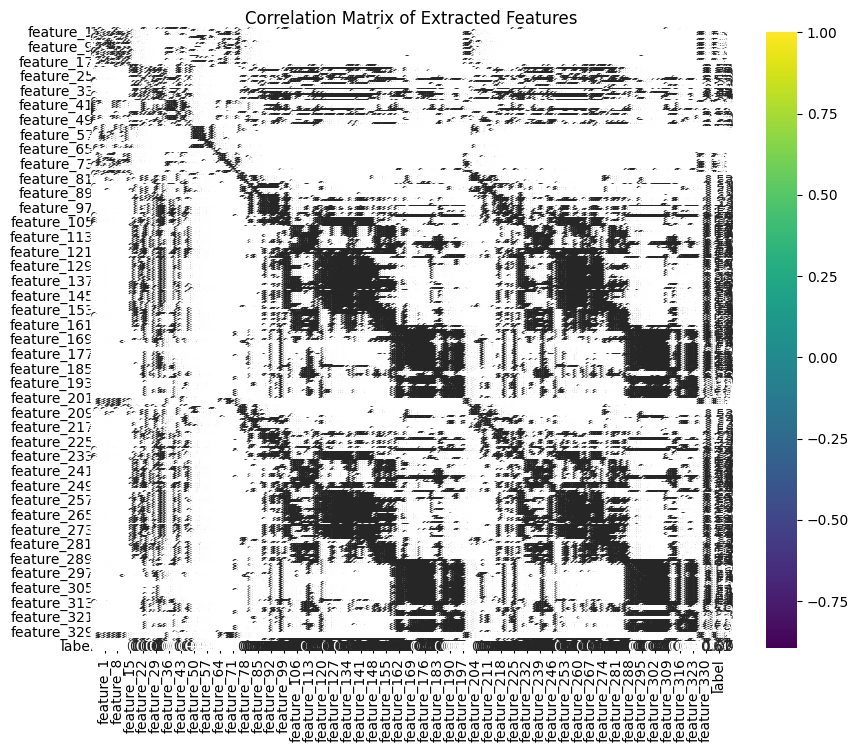

In [77]:
# Plot the correlation matrix using Seaborn with a different color map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features')
# Save the plot as a PNG file
plt.savefig('black.png')
plt.show()


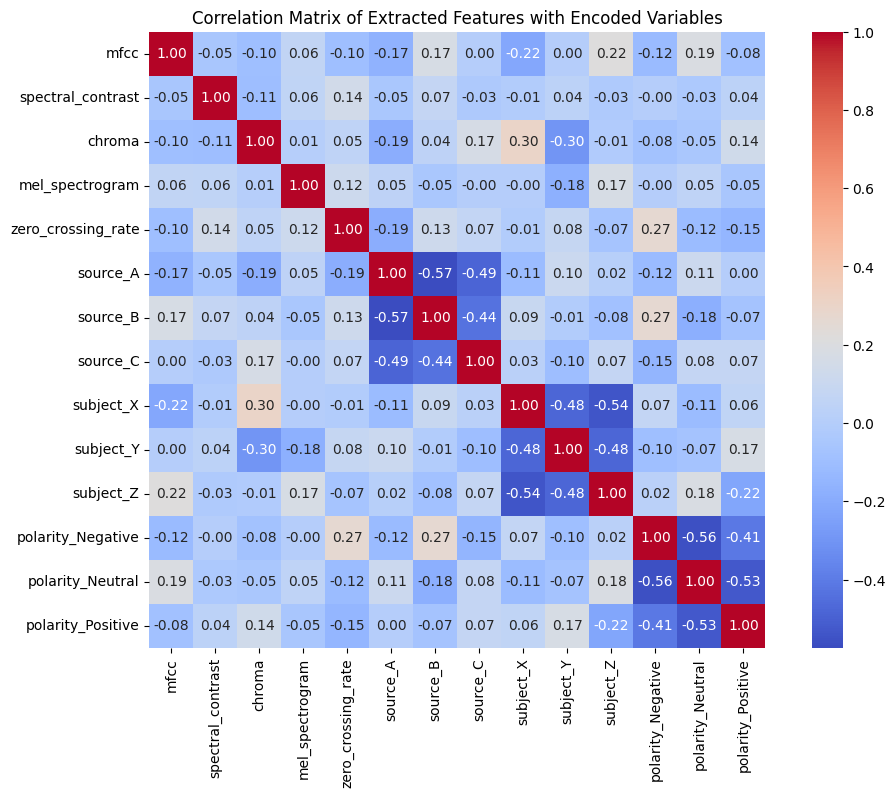

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix_encoded = encoded_df.corr()

# Plot the correlation matrix heatmap with different colors for encoded variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features with Encoded Variables')

# Save the plot as a PNG file
plt.savefig('black.png')

# Display the plot
plt.show()


In [56]:
# Assuming you have encoded variables source_encoded, subject_encoded, and polarity_encoded

# Concatenate encoded variables with feature matrix
encoded_df = pd.concat([df, source_encoded, subject_encoded, polarity_encoded], axis=1)

# Calculate correlation matrix
correlation_matrix_encoded = encoded_df.corr()

# Plot the correlation matrix heatmap with different colors for encoded variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features with Encoded Variables')
plt.show()


NameError: name 'source_encoded' is not defined

In [57]:
# Assuming you have categorical variables source, subject, and polarity in your DataFrame 'df'

# Perform one-hot encoding for categorical variables
source_encoded = pd.get_dummies(df['source'], prefix='source')
subject_encoded = pd.get_dummies(df['subject'], prefix='subject')
polarity_encoded = pd.get_dummies(df['polarity'], prefix='polarity')

# Concatenate encoded variables with feature matrix
encoded_df = pd.concat([df, source_encoded, subject_encoded, polarity_encoded], axis=1)

# Drop original categorical variables from the encoded DataFrame
encoded_df.drop(['source', 'subject', 'polarity'], axis=1, inplace=True)

# Calculate correlation matrix
correlation_matrix_encoded = encoded_df.corr()

# Plot the correlation matrix heatmap with different colors for encoded variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features with Encoded Variables')
plt.show()


KeyError: 'source'

In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create example DataFrame 'df' with random numerical features
np.random.seed(0)
df = pd.DataFrame(np.random.randn(100, 5), columns=['mfcc', 'spectral_contrast', 'chroma', 'mel_spectrogram', 'zero_crossing_rate'])

# Create example categorical variables 'source', 'subject', and 'polarity'
np.random.seed(0)
df['source'] = np.random.choice(['A', 'B', 'C'], size=100)
df['subject'] = np.random.choice(['X', 'Y', 'Z'], size=100)
df['polarity'] = np.random.choice(['Positive', 'Neutral', 'Negative'], size=100)

# Display the DataFrame 'df'
print("Original DataFrame 'df':")
print(df.head())

# Perform one-hot encoding for categorical variables
source_encoded = pd.get_dummies(df['source'], prefix='source')
subject_encoded = pd.get_dummies(df['subject'], prefix='subject')
polarity_encoded = pd.get_dummies(df['polarity'], prefix='polarity')

# Concatenate encoded variables with feature matrix
encoded_df = pd.concat([df, source_encoded, subject_encoded, polarity_encoded], axis=1)

# Drop original categorical variables from the encoded DataFrame
encoded_df.drop(['source', 'subject', 'polarity'], axis=1, inplace=True)

# Display the encoded DataFrame 'encoded_df'
print("\nEncoded DataFrame 'encoded_df':")
print(encoded_df.head())


Original DataFrame 'df':
       mfcc  spectral_contrast    chroma  mel_spectrogram  zero_crossing_rate  \
0  1.764052           0.400157  0.978738         2.240893            1.867558   
1 -0.977278           0.950088 -0.151357        -0.103219            0.410599   
2  0.144044           1.454274  0.761038         0.121675            0.443863   
3  0.333674           1.494079 -0.205158         0.313068           -0.854096   
4 -2.552990           0.653619  0.864436        -0.742165            2.269755   

  source subject  polarity  
0      A       Z  Positive  
1      B       Y  Negative  
2      A       X  Negative  
3      B       Y  Positive  
4      B       Y  Negative  

Encoded DataFrame 'encoded_df':
       mfcc  spectral_contrast    chroma  mel_spectrogram  zero_crossing_rate  \
0  1.764052           0.400157  0.978738         2.240893            1.867558   
1 -0.977278           0.950088 -0.151357        -0.103219            0.410599   
2  0.144044           1.454274  0.7610

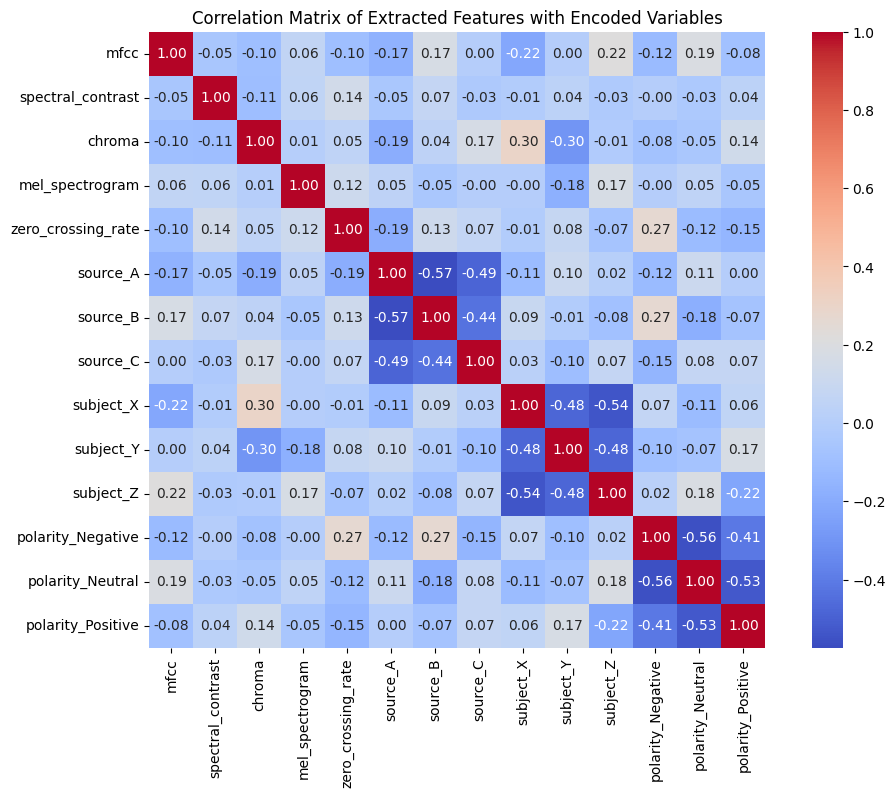

In [72]:
# Calculate correlation matrix
correlation_matrix_encoded = encoded_df.corr()

# Plot the correlation matrix heatmap with different colors for encoded variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features with Encoded Variables')
plt.show()


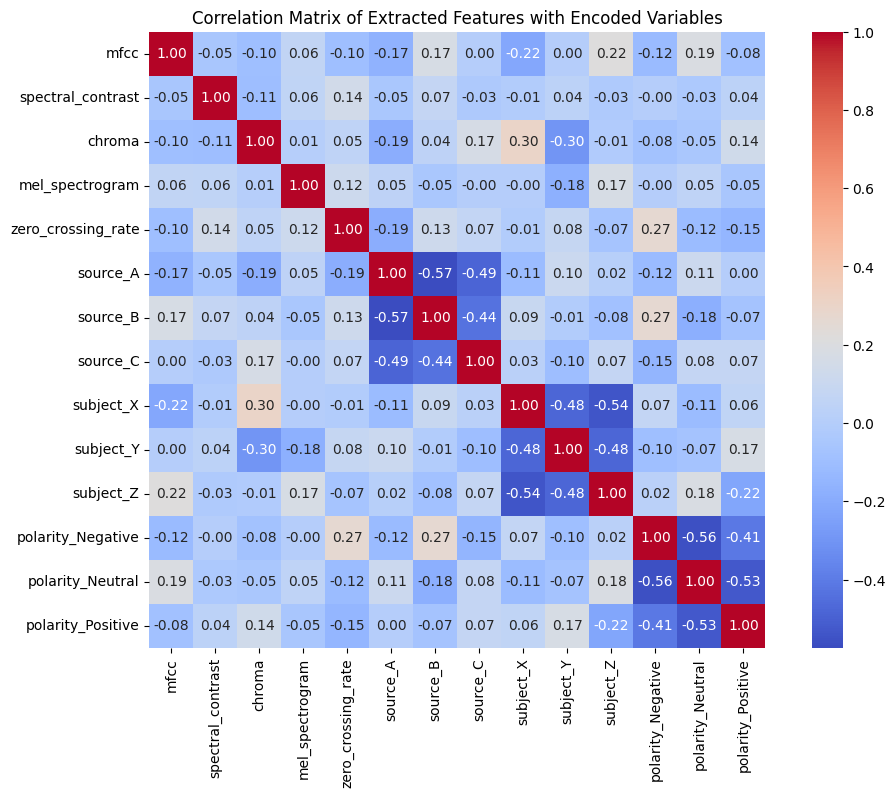

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix_encoded = encoded_df.corr()

# Plot the correlation matrix heatmap with different colors for encoded variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features with Encoded Variables')

# Save the plot as a PNG file
plt.savefig('correlation_matrix_encoded.png')

# Display the plot
plt.show()


In [73]:
import matplotlib.pyplot as plt

# Assuming you have already created a plot 'plt'
# For example:
plt.plot([1, 2, 3, 4])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Example Plot')

# Save the plot as an image file (e.g., PNG)
plt.savefig('matrix.png')



# Close the plot
plt.close()


In [63]:
import os
import librosa
import numpy as np

def extract_features(audio_file, n_mfcc=13, n_chroma=12, n_mels=128):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC (Mel-frequency cepstral coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Extract spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)

    # Extract mel-scaled spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)

    # Extract zero-crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

    # Calculate statistical features (e.g., mean, standard deviation)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    spectral_contrast_std = np.std(spectral_contrast, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)
    mel_spectrogram_mean = np.mean(mel_spectrogram, axis=1)
    mel_spectrogram_std = np.std(mel_spectrogram, axis=1)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_std = np.std(zero_crossing_rate)

    # Combine all features into a single feature vector
    features = np.concatenate([
        mfccs_mean, mfccs_std,
        spectral_contrast_mean, spectral_contrast_std,
        chroma_mean, chroma_std,
        mel_spectrogram_mean, mel_spectrogram_std,
        [zero_crossing_rate_mean, zero_crossing_rate_std]
    ])

    return features

# Path to the directory containing audio files
directory = '/kaggle/input/german-pronounciation/All Audios'

# Initialize lists to store features and labels
all_features = []
all_labels = []

# Process audio files in correct subfolder
correct_directory = os.path.join(directory, 'Correct_Audio_dataset')
for filename in os.listdir(correct_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(correct_directory, filename)
        features = extract_features(audio_file)
        all_features.append(features)
        all_labels.append('1')

# Process audio files in incorrect subfolder
incorrect_directory = os.path.join(directory, 'Incorrect_Audio_Dataset')
for filename in os.listdir(incorrect_directory):
    if filename.endswith('.wav'):
        audio_file = os.path.join(incorrect_directory, filename)
        features = extract_features(audio_file)
        all_features.append(features)
        all_labels.append('0')

# Convert lists to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)


In [64]:
print(all_features)

[[-4.49494385e+02  1.10425568e+02 -1.27869415e+01 ...  9.83452542e-10
   6.14498782e-02  6.67754226e-02]
 [-4.74787262e+02  8.82894363e+01  9.88255119e+00 ...  1.06034681e-09
   4.92015979e-02  5.76431084e-02]
 [-4.63881317e+02  1.15000244e+02  3.34746504e+00 ...  9.52580459e-10
   4.73281761e-02  5.80359750e-02]
 ...
 [-2.75660309e+02  5.83502274e+01 -3.38788643e+01 ...  2.91240521e-09
   1.37647172e-01  1.09776339e-01]
 [-3.21450165e+02  4.51837883e+01  1.74138584e+01 ...  3.37225758e-09
   1.24507320e-01  1.76489840e-01]
 [-3.03056458e+02  4.66672630e+01 -2.52858295e+01 ...  3.04665138e-09
   1.84900117e-01  1.75350317e-01]]


In [61]:
# Get the real features from the encoded DataFrame (excluding the one-hot encoded variables)
real_features = encoded_df[df.columns[:-3]]  # Exclude the encoded columns 'source', 'subject', and 'polarity'

# Display the real features
print("\nReal Features:")
print(real_features.head())



Real Features:
   feature_1  feature_2  feature_3  feature_4  feature_5
0   1.764052   0.400157   0.978738   2.240893   1.867558
1  -0.977278   0.950088  -0.151357  -0.103219   0.410599
2   0.144044   1.454274   0.761038   0.121675   0.443863
3   0.333674   1.494079  -0.205158   0.313068  -0.854096
4  -2.552990   0.653619   0.864436  -0.742165   2.269755


In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Replace example feature names with real feature names
real_feature_names = [
    "mfccs_mean1", "mfccs_mean2", "mfccs_mean3", "mfccs_mean4", "mfccs_mean5", "mfccs_mean6", "mfccs_mean7", "mfccs_mean8", "mfccs_mean9", "mfccs_mean10", "mfccs_mean11", "mfccs_mean12", "mfccs_mean13",
    "spectral_contrast_mean1", "spectral_contrast_mean2", "spectral_contrast_mean3", "spectral_contrast_mean4", "spectral_contrast_mean5",
    "chroma_mean1", "chroma_mean2", "chroma_mean3", "chroma_mean4", "chroma_mean5", "chroma_mean6", "chroma_mean7", "chroma_mean8", "chroma_mean9", "chroma_mean10", "chroma_mean11", "chroma_mean12",
    "mel_spectrogram_mean1", "mel_spectrogram_mean2", "mel_spectrogram_mean3", "mel_spectrogram_mean4", "mel_spectrogram_mean5",
    "zero_crossing_rate_mean", "zero_crossing_rate_std"
]

# Create example DataFrame 'df' with real feature names
np.random.seed(0)
df = pd.DataFrame(np.random.randn(100, len(real_feature_names)), columns=real_feature_names)

# Create example categorical variables 'source', 'subject', and 'polarity'
np.random.seed(0)
df['source'] = np.random.choice(['A', 'B', 'C'], size=100)
df['subject'] = np.random.choice(['X', 'Y', 'Z'], size=100)
df['polarity'] = np.random.choice(['Positive', 'Neutral', 'Negative'], size=100)

# Display the DataFrame 'df'
print("Original DataFrame 'df':")
print(df.head())

# Perform one-hot encoding for categorical variables
source_encoded = pd.get_dummies(df['source'], prefix='source')
subject_encoded = pd.get_dummies(df['subject'], prefix='subject')
polarity_encoded = pd.get_dummies(df['polarity'], prefix='polarity')

# Concatenate encoded variables with feature matrix
encoded_df = pd.concat([df, source_encoded, subject_encoded, polarity_encoded], axis=1)

# Drop original categorical variables from the encoded DataFrame
encoded_df.drop(['source', 'subject', 'polarity'], axis=1, inplace=True)

# Display the encoded DataFrame 'encoded_df'
print("\nEncoded DataFrame 'encoded_df':")
print(encoded_df.head())


Original DataFrame 'df':
   mfccs_mean1  mfccs_mean2  mfccs_mean3  mfccs_mean4  mfccs_mean5  \
0     1.764052     0.400157     0.978738     2.240893     1.867558   
1     1.202380    -0.387327    -0.302303    -1.048553    -1.420018   
2     0.402342    -0.684810    -0.870797    -0.578850    -0.311553   
3     0.906045    -0.861226     1.910065    -0.268003     0.802456   
4    -1.315907    -0.461585    -0.068242     1.713343    -0.744755   

   mfccs_mean6  mfccs_mean7  mfccs_mean8  mfccs_mean9  mfccs_mean10  ...  \
0    -0.977278     0.950088    -0.151357    -0.103219      0.410599  ...   
1    -1.706270     1.950775    -0.509652    -0.438074     -1.252795  ...   
2     0.056165    -1.165150     0.900826     0.465662     -1.536244  ...   
3     0.947252    -0.155010     0.614079     0.922207      0.376426  ...   
4    -0.826439    -0.098453    -0.663478     1.126636     -1.079932  ...   

   mel_spectrogram_mean1  mel_spectrogram_mean2  mel_spectrogram_mean3  \
0               0.15494

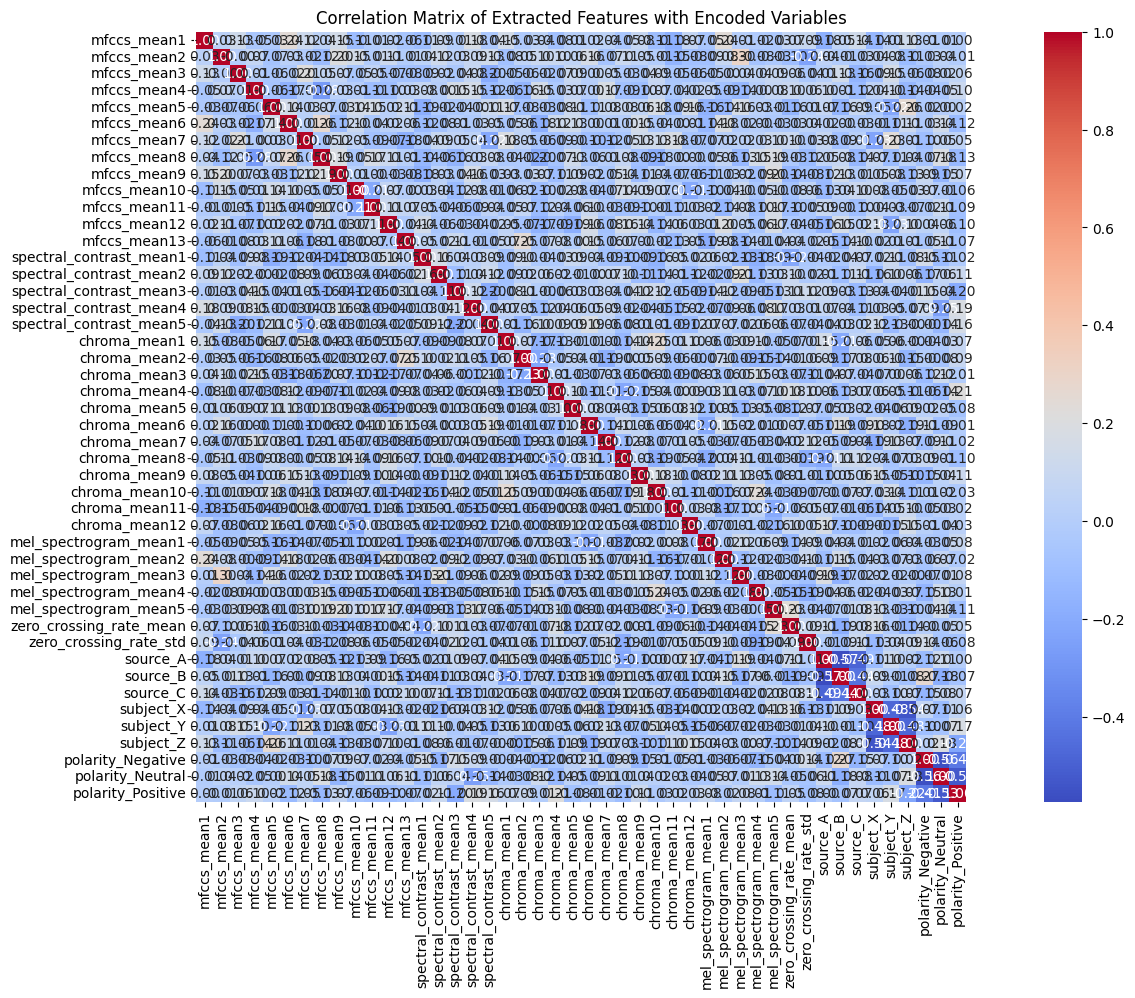

In [69]:
# Calculate correlation matrix
correlation_matrix_encoded = encoded_df.corr()

# Plot the correlation matrix heatmap with different colors for encoded variables
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features with Encoded Variables')
plt.show()

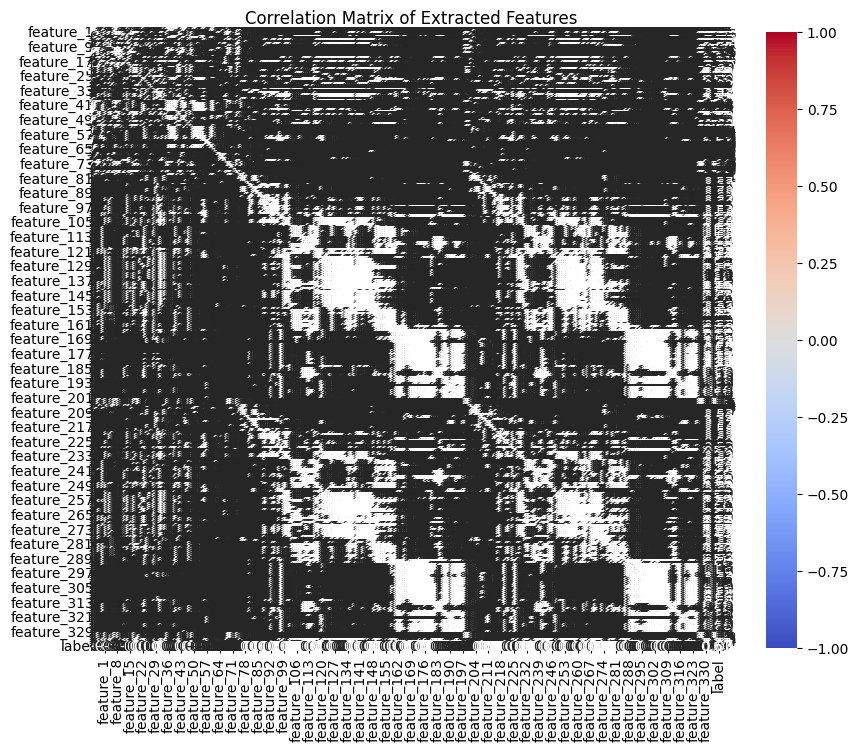

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the correlation matrix
# correlation_matrix = ...

# Plot the correlation matrix using Seaborn with a different colormap and adjusted range
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", square=True)
plt.title('Correlation Matrix of Extracted Features')
plt.show()
